# Problem Statement

The project's purpose is to "predict the potentially fraudulent providers" based on the claims they file. Together with this, we will find significant characteristics that will aid in spotting possibly fraudulent providers' behaviour. In addition, we will investigate fraudulent tendencies in provider claims to better predict provider behaviour in the future.

### Dataset

1)Inpatient Data:
This data gives information regarding the claims submitted for patients admitted to hospitals.
It also includes information such as their admission and discharge dates, as well as their admit diagnostic code. 

2)Outpatient Data:
This data contains information regarding claims submitted for people who visit hospitals but are not admitted. 

c)Beneficiary Details Data:
This data comprises beneficiary KYC information such as health problems, region of residence, and so forth.


### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler

### Loading Train & Test datasets

In [2]:
# Load Train Dataset

Train=pd.read_csv("Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("Train_Outpatientdata-1542865627584.csv")

In [3]:
# Load Test Dataset

Test=pd.read_csv("Test-1542969243754.csv")
Test_Beneficiarydata=pd.read_csv("Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata=pd.read_csv("Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata=pd.read_csv("Test_Outpatientdata-1542969243754.csv")


In [4]:
#Checking the shapes of train dataset
print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)


Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)


In [5]:
#Checking the shapes of test dataset
print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


In [6]:
#Checking the missing values of beneficiary data.

Train_Beneficiarydata.isna().sum()
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [7]:
#checking data types of each column in beneficiary data

Train_Beneficiarydata.dtypes
Test_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [8]:
Train_Beneficiarydata.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [9]:
#Replacing 2 with 0 for chronic conditions ,that means chronic condition No is 0 and yes is 1 - in beneficiary data

Train_Beneficiarydata = Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [10]:
Train_Beneficiarydata.head(5)
Test_Beneficiarydata.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,0,1,0,1,1,0,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,0,1,1,1,0,0,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,0,0,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,1,45,780,12,12,...,1,0,1,0,0,0,21260,2136,120,100


**Add Age of Person based on his/her DOD(Date of death ) and DOB (Date of Birth)**

In [11]:
#Create Age column to the dataset

Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)


Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)

In [12]:
#As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
#so we will calculate age of other benficiaries for year 2009.

Train_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Train_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)


Test_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Test_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)

In [13]:
Train_Beneficiarydata.head(2)
Test_Beneficiarydata.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,69.0


**Add Flag column 'WhetherDead' using DOD values to tell whether beneficiary is dead on not**

In [14]:
#Lets create a new variable 'WhetherDead' with flag 1 means Dead and 0 means not Dead

Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(),'WhetherDead']=1


Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'WhetherDead']=1

In [15]:
#Checking missing values in each column in inpatient data
Train_Inpatientdata.isna().sum()

Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

**Create new column 'AdmitForDays' indicating number of days patient was admitted in hospital**

In [16]:
#As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days)+1


Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1

In [17]:
#Checking Min and Max values of AdmitforDays column in Train and Test.
print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())
Train_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())
Test_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

In [18]:
#Checking the null values of outpatient data
Train_Outpatientdata.isna().sum()

Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [19]:
##Checking the Shape of datasets after adding new variables

print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 27)
Shape of Train_Inpatientdata data : (40474, 31)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 27)
Shape of Test_Inpatientdata data : (9551, 31)
Shape of Test_Outpatientdata data : (125841, 27)


### Data Merging


As we see columns in inpatient and outpatient data are similar, we will merge this data based on these similar keys using outer join.

In [20]:
Key_Column_To_Merge_Outpatient=Train_Outpatientdata.columns
print(Key_Column_To_Merge_Outpatient)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


Merge Inpatient and Outpatient

In [21]:
#We will use all keys in outpatient data as we want to merge and dont want duplicate columns from both tables.

Train_Allpatient=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')



In [22]:
Test_Allpatient=pd.merge(Test_Outpatientdata,Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [23]:
print('Train_Allpatient',Train_Allpatient.shape)
print('Test_Allpatient',Test_Allpatient.shape)

Train_Allpatient (558211, 31)
Test_Allpatient (135392, 31)


In [24]:
Train_Allpatient.head(4)
Test_Allpatient.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,0.0,5939,NaT,NaT,NaN,NaN


Merge Beneficiary details to All Patients data

In [25]:
#Merging All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
Train_all_detail=pd.merge(Train_Allpatient,Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

Test_all_detail=pd.merge(Test_Allpatient,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [26]:
#Printing shape of data 
print('Shape of All Patient Details Train : ',Train_all_detail.shape)
Train_all_detail.head()

print('Shape of All Patient Details Test : ',Test_all_detail.shape)
Test_all_detail.head(2)

Shape of All Patient Details Train :  (558211, 57)
Shape of All Patient Details Test :  (135392, 57)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,1,0,1,1,36000,3204,60,70,67.0,0.0
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,1,0,1,1,36000,3204,60,70,67.0,0.0


Merge PotentialFraud details for each provider to create Provider data along with Patient Details 

In [27]:
#Merging patient data with fradulent providers details data with "Provider" as joining key for inner join

Train_Provider =pd.merge(Train,Train_all_detail,on='Provider')

Test_Provider =pd.merge(Test,Test_all_detail,on='Provider')

In [28]:
#Printing the shape of dataset 
print("Shape of Train Provider with Patient Details data :-",Train_Provider.shape)
Train_Provider.head()

print("Shape of Test Provider with Patient Details data :-",Test_Provider.shape)
Test_Provider.head(2)

Shape of Train Provider with Patient Details data :- (558211, 58)
Shape of Test Provider with Patient Details data :- (135392, 57)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100,PHY418314,PHY418314,PHY413853,514,...,0,0,0,0,0,0,1310,590,75.0,0.0
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,7840,...,1,0,0,0,22000,3204,1020,910,89.0,0.0


In [29]:
print("Expected rows after addition",135392+558211)

Expected rows after addition 693603


In [30]:
#Checking the  missing value percentage of all the columns

print('Percent missing values in Train Provider with patient details data :\n')
Train_Provider.isnull().sum()*100/len(Train_Provider)


print('Percent missing values in Test Provider with patient details data :\n')
Test_Provider.isnull().sum()*100/len(Test_Provider)

Percent missing values in Train Provider with patient details data :

Percent missing values in Test Provider with patient details data :



Provider                             0.000000
BeneID                               0.000000
ClaimID                              0.000000
ClaimStartDt                         0.000000
ClaimEndDt                           0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.256293
OperatingPhysician                  79.915357
OtherPhysician                      64.080596
ClmDiagnosisCode_1                   1.904101
ClmDiagnosisCode_2                  35.293814
ClmDiagnosisCode_3                  56.682817
ClmDiagnosisCode_4                  70.739039
ClmDiagnosisCode_5                  80.207102
ClmDiagnosisCode_6                  85.109903
ClmDiagnosisCode_7                  88.341261
ClmDiagnosisCode_8                  90.603581
ClmDiagnosisCode_9                  92.705625
ClmDiagnosisCode_10                 99.150615
ClmProcedureCode_1                  95.962095
ClmProcedureCode_2                  99.067153
ClmProcedureCode_3                

In [31]:
##Checking the dtypes of both the datasets
Train_Provider.dtypes
Test_Provider.dtypes

Provider                                   object
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object
ClmDiagnosisCode_7                         object
ClmDiagnosisCode_8                         object
ClmDiagnosisCode_9                         object
ClmDiagnosisCode_10                        object
ClmProcedureCode_1                        float64


In [32]:
#Creating a copy of test data first and merge test with train to get better feature averages

Test_ProviderWithPatientDetailsdata=Test_Provider

In [33]:
#Checking shape of copy

print('Shape of Test Copy :-',Test_ProviderWithPatientDetailsdata.shape)

Shape of Test Copy :- (135392, 57)


Merging Train and Test ( 2 dataframe merging vertically)

In [34]:
#We will concat two datasets using columns of Test data only as we dont see target column in Test data.

col_merge=Test_Provider.columns

In [35]:
#Adding both test and train datasets

Test_Provider=pd.concat([Test_Provider,
                         Train_Provider[col_merge]])

In [36]:
#Verifying shape after concatenating

print("Shape of Test After Concatenation",Test_Provider.shape)


Shape of Test After Concatenation (693603, 57)


### EDA

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribution of the number of fraudulent and non-fraudulent suppliers. 

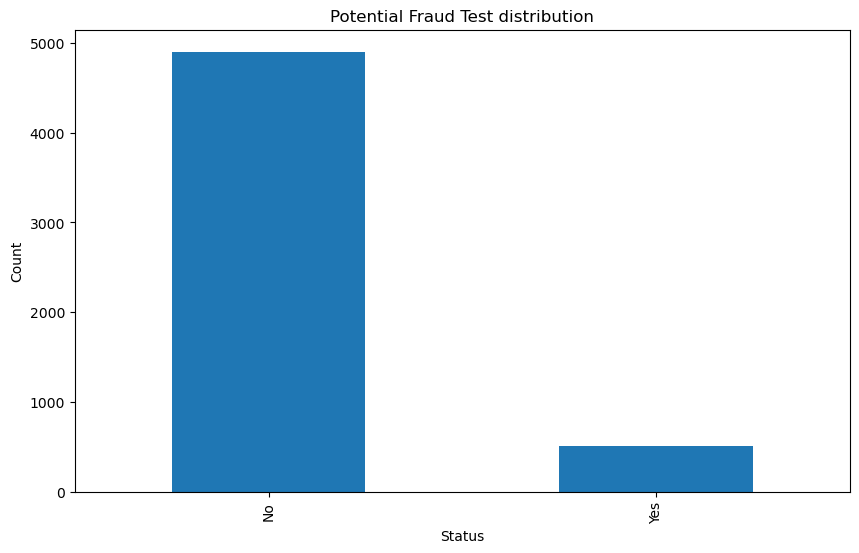

In [38]:
plt.title("Potential Fraud Test distribution")
Train.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

Inpatient Procedure Distribution : Some of the common procedures opted by inpatients.

In [39]:
procedures =  pd.DataFrame(columns = ['Procedures'])
procedures['Procedures'] = pd.concat([
                                          Train_Inpatientdata["ClmProcedureCode_1"], 
                                          Train_Inpatientdata["ClmProcedureCode_2"], 
                                          Train_Inpatientdata["ClmProcedureCode_3"], 
                                          Train_Inpatientdata["ClmProcedureCode_4"], 
                                          Train_Inpatientdata["ClmProcedureCode_5"], 
                                          Train_Inpatientdata["ClmProcedureCode_6"]
                                          ], axis=0, sort=True).dropna()
                            
procedures.head(10)
procedure_group = procedures['Procedures'].value_counts()

procedure_g1 = procedure_group.to_frame()
procedure_g1.columns = ['count']
procedure_g1['Procedure'] = procedure_g1.index
procedure_g1['Percentage'] = (procedure_g1['count']/sum(procedure_g1['count']))*100
procedure_g1.head(5)

,count,Procedure,Percentage
4019.0,1953,4019.0,6.577529
9904.0,1137,9904.0,3.829314
2724.0,1047,2724.0,3.526202
8154.0,1021,8154.0,3.438637
66.0,894,66.0,3.010912


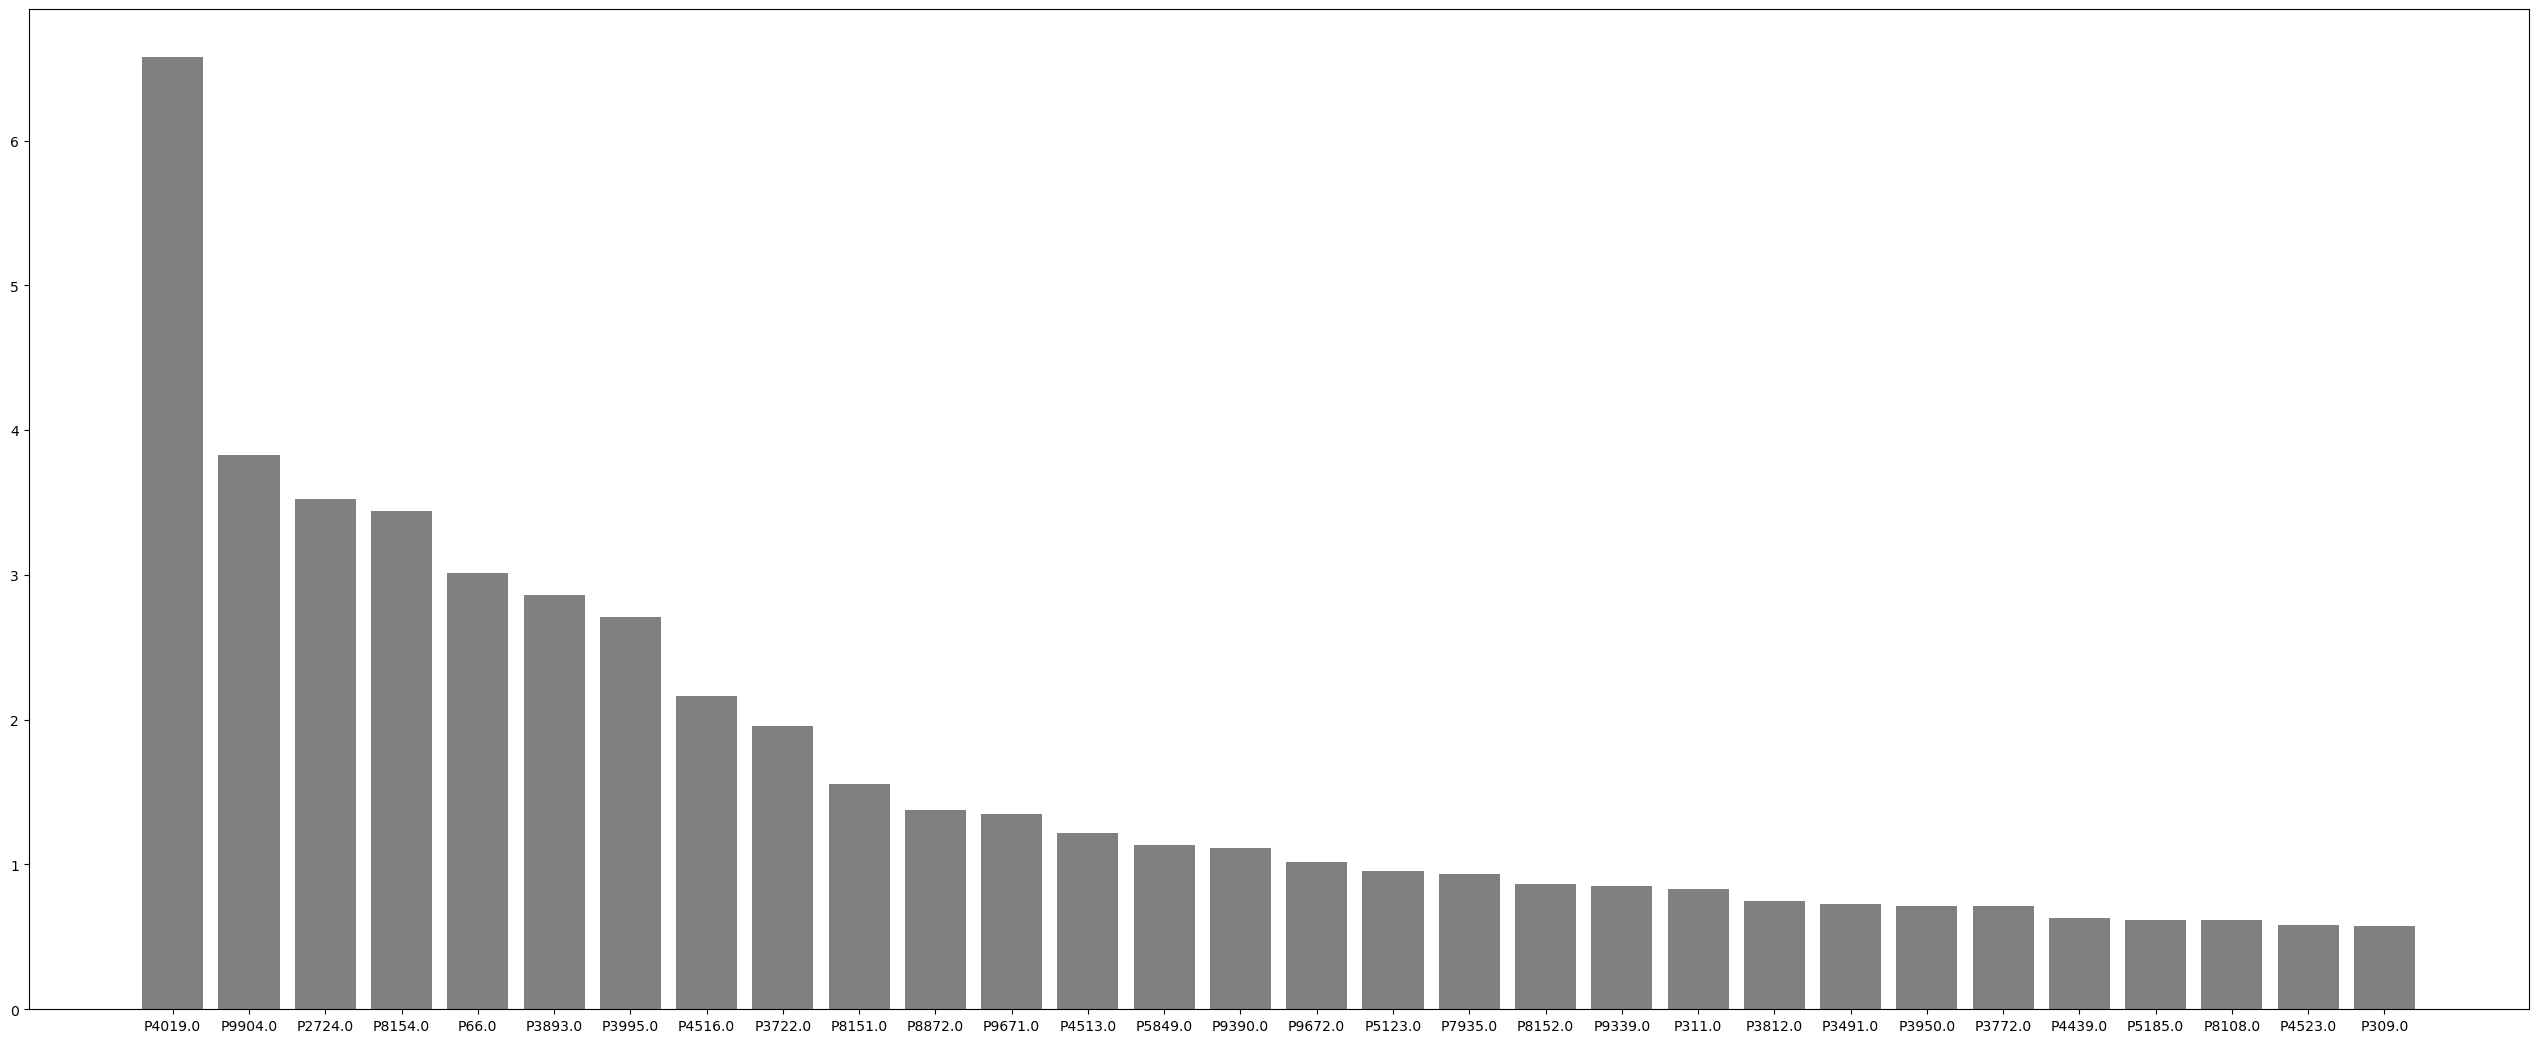

In [40]:
plot_procedure = procedure_g1.head(30)

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

plot_procedure['Procedure'] = 'P' + plot_procedure['Procedure'].astype(str)
plot_procedure.sort_values(by=['Percentage'])
ax.bar(plot_procedure['Procedure'],plot_procedure['Percentage'], color='grey')
plt.show()
     

We can observe that the most commonly utilised procedures for inpatinet are 4019, 9904, and 2724, among others.

Inpatient Diagnosis Distribution: Common diagnosis opted.

In [41]:
diagnosis =  pd.DataFrame(columns = ['diagnosis'])
diagnosis['diagnosis'] = pd.concat([
                                          Train_Inpatientdata["ClmDiagnosisCode_1"], 
                                          Train_Inpatientdata["ClmDiagnosisCode_2"], 
                                          Train_Inpatientdata["ClmDiagnosisCode_3"], 
                                          Train_Inpatientdata["ClmDiagnosisCode_4"],
                                          Train_Inpatientdata["ClmDiagnosisCode_5"],
                                          Train_Inpatientdata["ClmDiagnosisCode_6"],
                                          Train_Inpatientdata["ClmDiagnosisCode_7"],
                                          Train_Inpatientdata["ClmDiagnosisCode_8"], 
                                          Train_Inpatientdata["ClmDiagnosisCode_9"], 
                                          Train_Inpatientdata["ClmDiagnosisCode_10"]
                                          ], axis=0, sort=True).dropna()
                            
diagnosis_group = diagnosis['diagnosis'].value_counts()

diagnosis_g1 = diagnosis_group.to_frame()
diagnosis_g1.columns = ['count']
diagnosis_g1['diagnosis'] = diagnosis_g1.index
diagnosis_g1['Percentage'] = (diagnosis_g1['count']/sum(diagnosis_g1['count']))*100
diagnosis_g1.head()

,count,diagnosis,Percentage
4019,14153,4019,4.323798
2724,7340,2724,2.242399
25000,7334,25000,2.240566
41401,6442,41401,1.968057
4280,6190,4280,1.891070


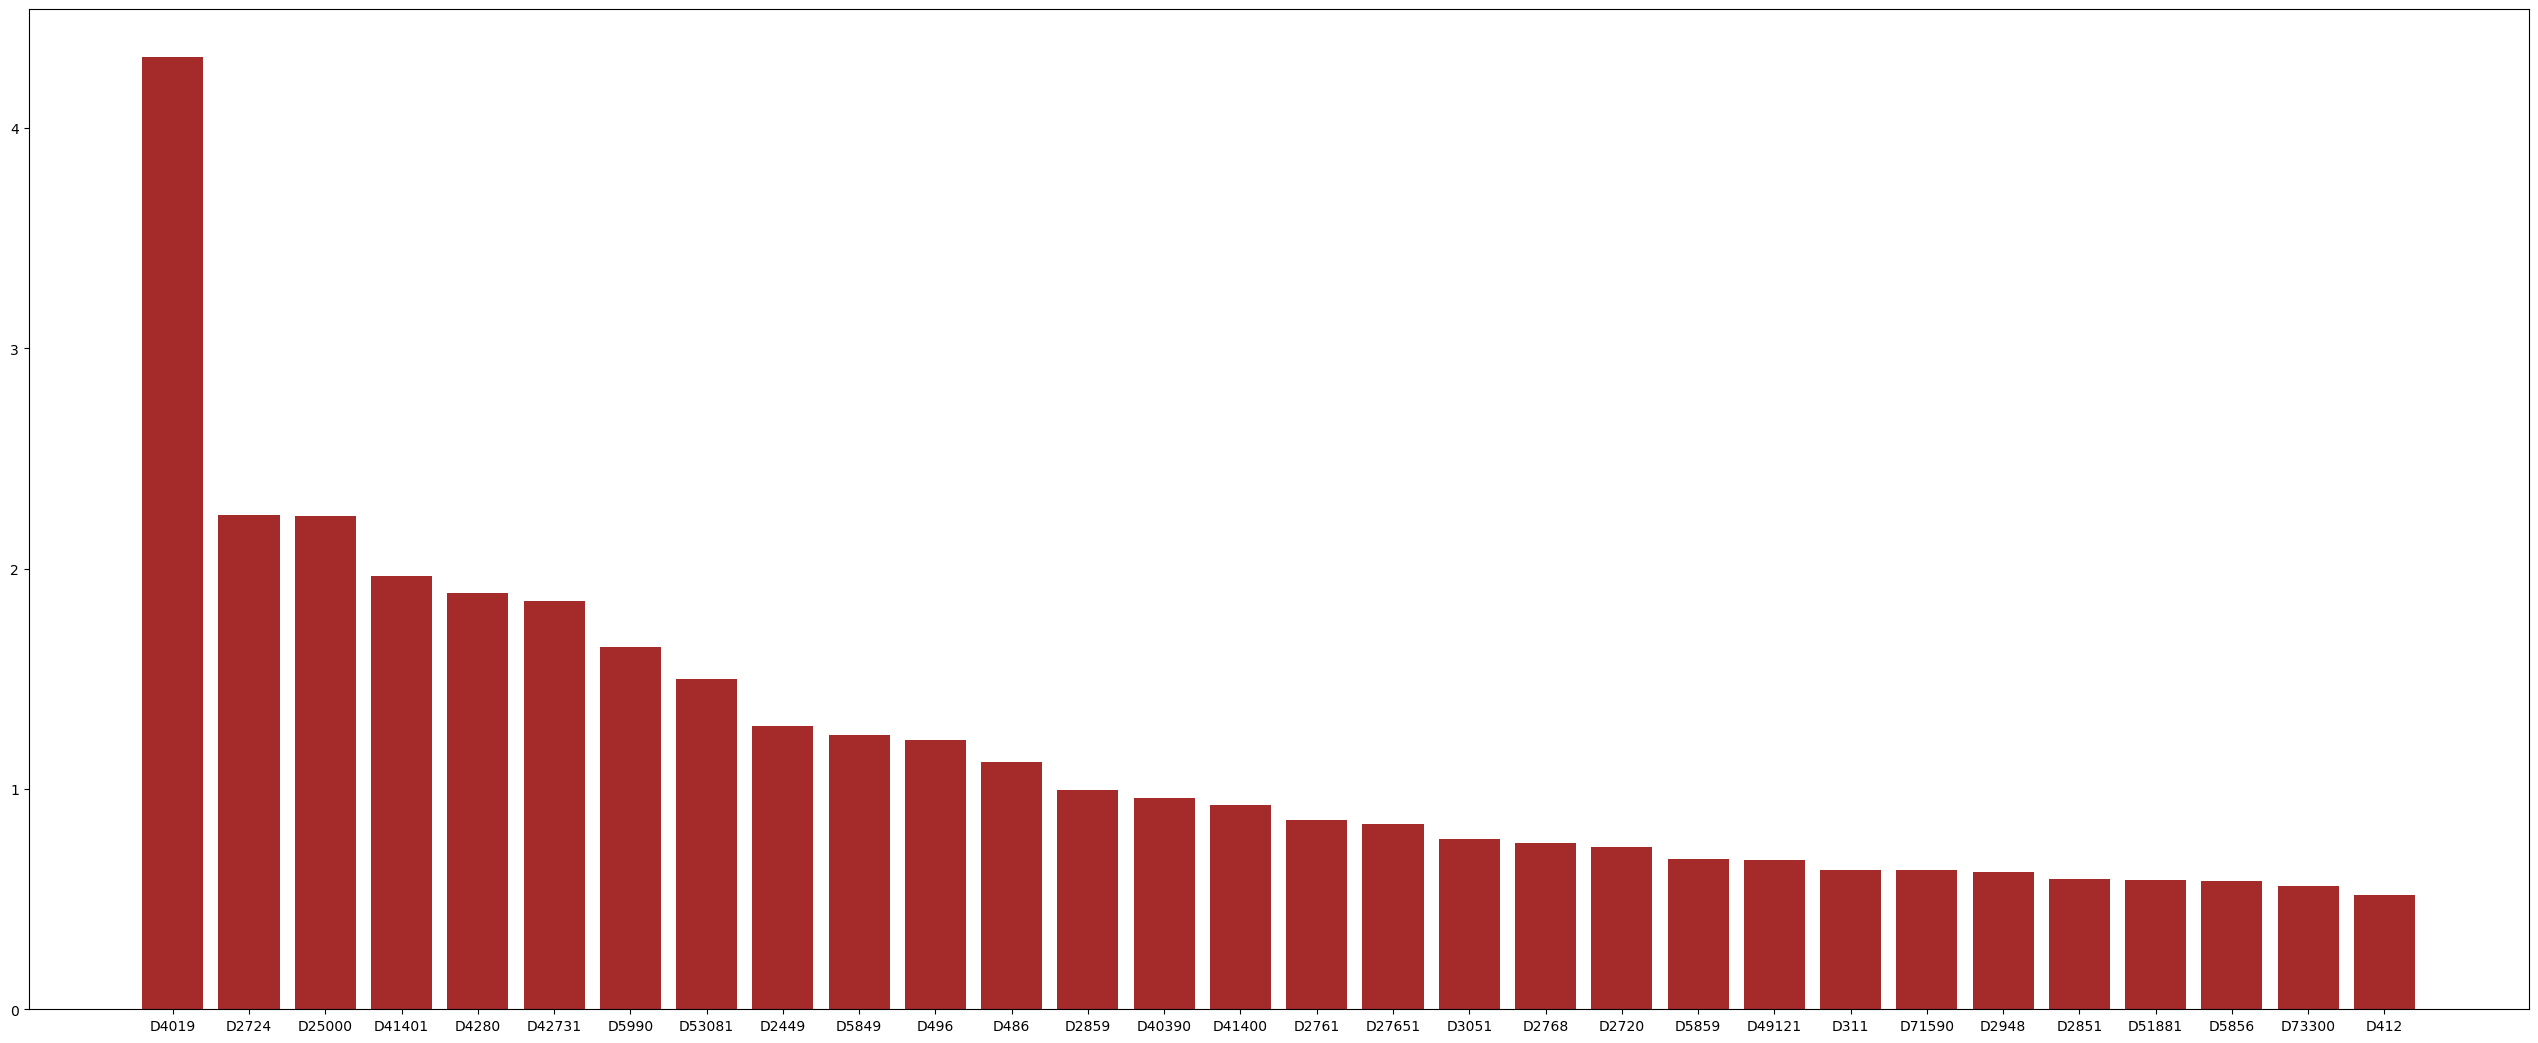

In [42]:
plot_diagnosis = diagnosis_g1.head(30)

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

plot_diagnosis['diagnosis'] = 'D' + plot_diagnosis['diagnosis'].astype(str)
plot_diagnosis.sort_values(by=['Percentage'])
ax.bar(plot_diagnosis['diagnosis'],plot_diagnosis['Percentage'], color='brown')
plt.show()
     


OUTPATIENT (The patients who visits the hospital for treatment but are not admitted): Common procedure opted.

In [43]:
procedures1 =  pd.DataFrame(columns = ['Procedures'])
procedures1['Procedures'] = pd.concat([
                                          Train_Outpatientdata["ClmProcedureCode_1"], 
                                          Train_Outpatientdata["ClmProcedureCode_2"], 
                                          Train_Outpatientdata["ClmProcedureCode_3"], 
                                          Train_Outpatientdata["ClmProcedureCode_4"], 
                                          Train_Outpatientdata["ClmProcedureCode_5"], 
                                          Train_Outpatientdata["ClmProcedureCode_6"]
                                          ], axis=0, sort=True).dropna()
                            
procedures1.head(10)
procedure1_group = procedures1['Procedures'].value_counts()

procedure_g2 = procedure1_group.to_frame()
procedure_g2.columns = ['count']
procedure_g2['Procedure'] = procedure_g2.index
procedure_g2['Percentage'] = (procedure_g2['count']/sum(procedure_g2['count']))*100
procedure_g2.head()
     


,count,Procedure,Percentage
9904.0,15,9904.0,7.352941
4516.0,8,4516.0,3.921569
3722.0,8,3722.0,3.921569
66.0,7,66.0,3.431373
5123.0,7,5123.0,3.431373


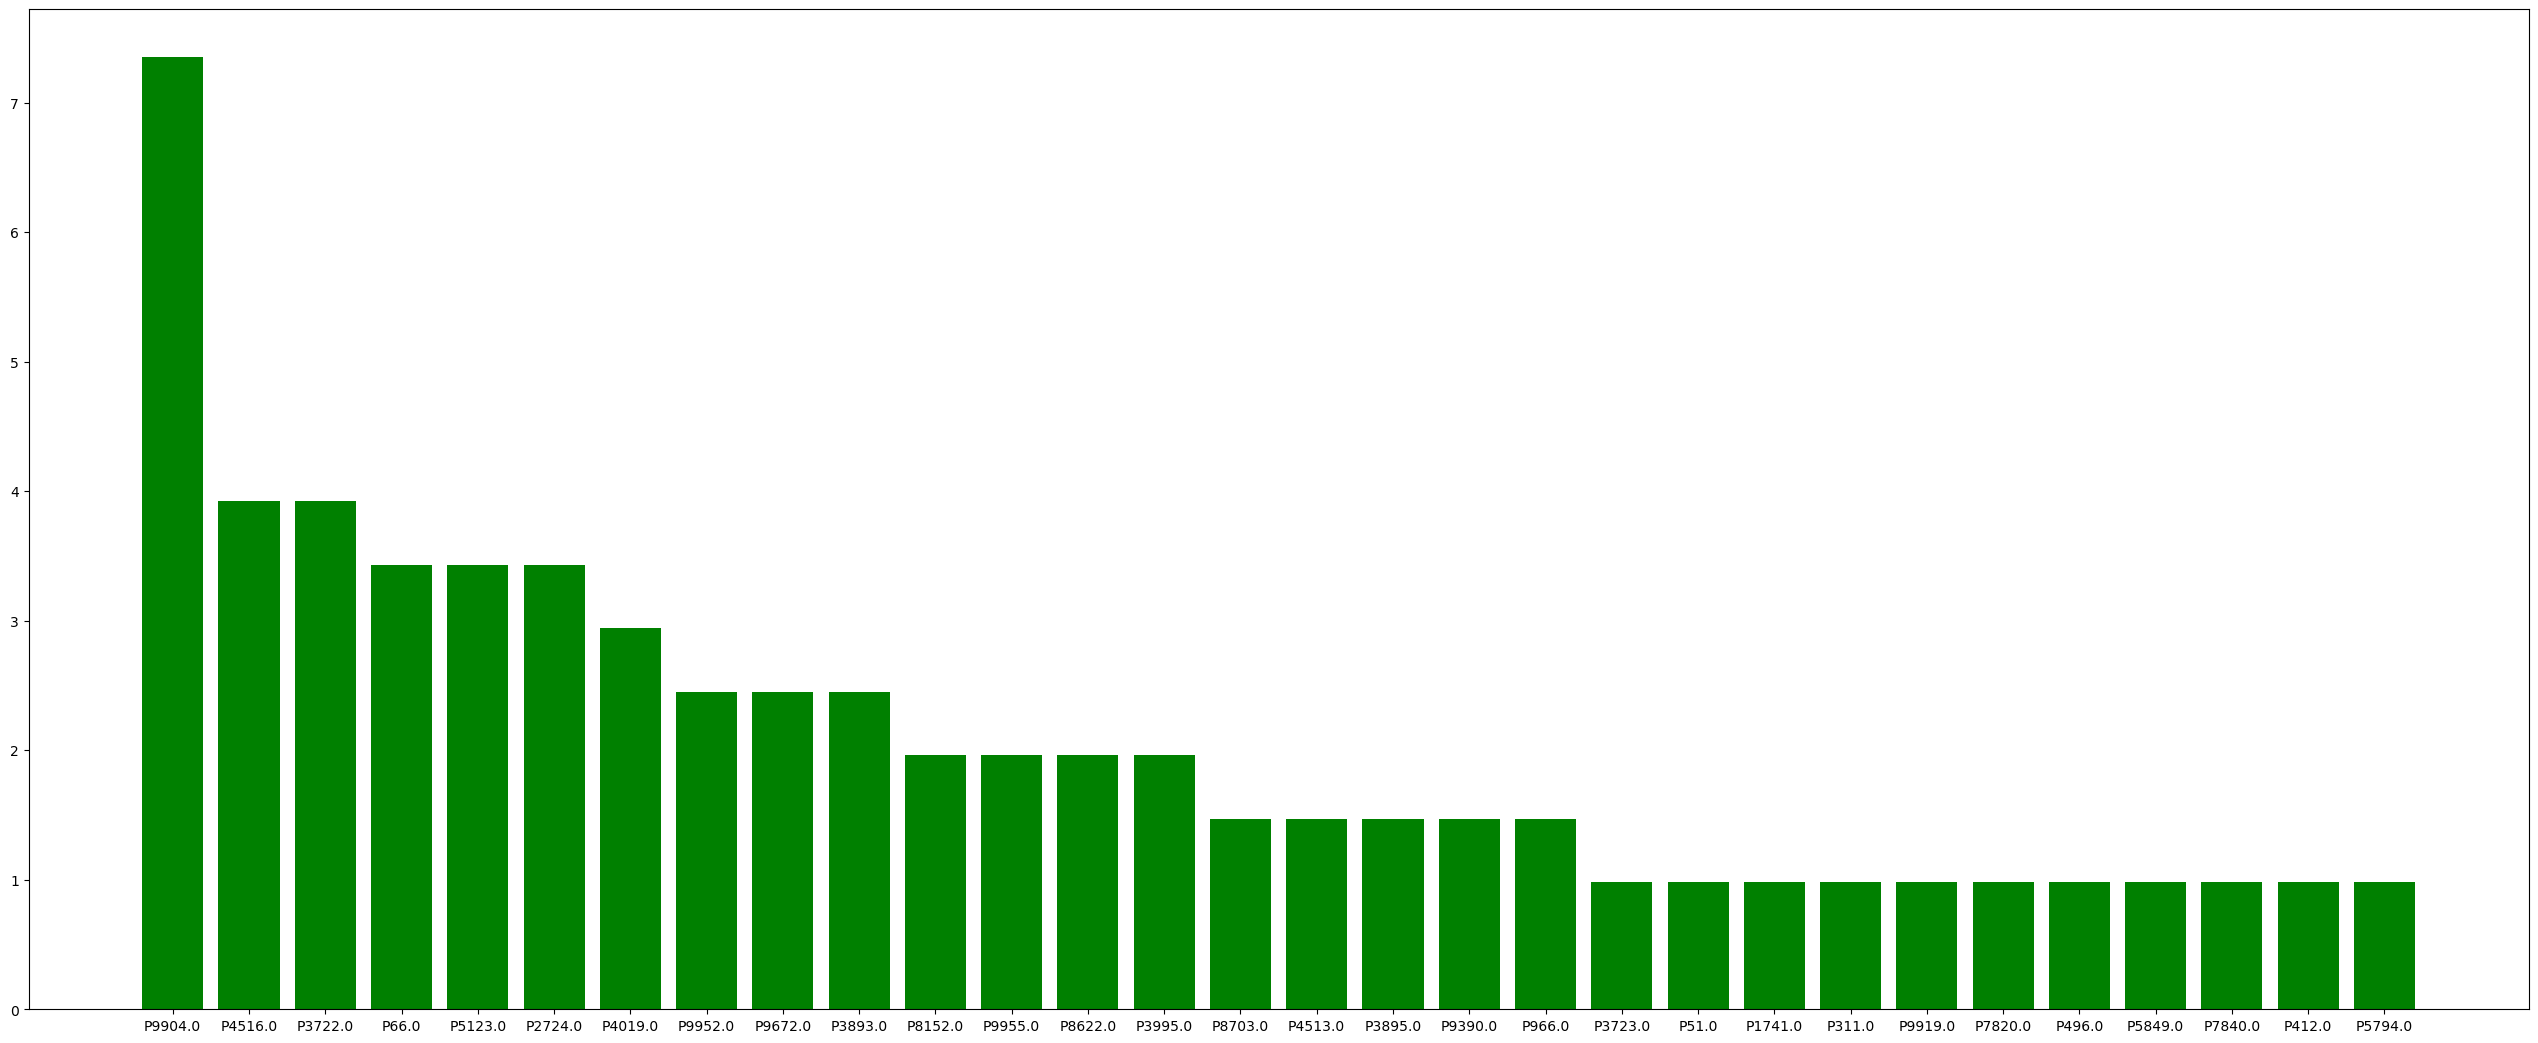

In [44]:
plot_procedure1 = procedure_g2.head(30)

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

plot_procedure1['Procedure'] = 'P' + plot_procedure1['Procedure'].astype(str)
plot_procedure1.sort_values(by=['Percentage'])
ax.bar(plot_procedure1['Procedure'],plot_procedure1['Percentage'], color='green')
plt.show()

We can observe that the usual methods alter slightly in the case of outpatients. We can observe that the most typical procedures utilised for the internet are 9904, 3722, and 4516, among others.

Outpatient common Diagnosis Distribution

In [45]:
diagnosis1 =  pd.DataFrame(columns = ['diagnosis'])
diagnosis1['diagnosis'] = pd.concat([
                                          Train_Outpatientdata["ClmDiagnosisCode_1"], 
                                          Train_Outpatientdata["ClmDiagnosisCode_2"], 
                                          Train_Outpatientdata["ClmDiagnosisCode_3"], 
                                          Train_Outpatientdata["ClmDiagnosisCode_4"],
                                          Train_Outpatientdata["ClmDiagnosisCode_5"],
                                          Train_Outpatientdata["ClmDiagnosisCode_6"],
                                          Train_Outpatientdata["ClmDiagnosisCode_7"],
                                          Train_Outpatientdata["ClmDiagnosisCode_8"], 
                                          Train_Outpatientdata["ClmDiagnosisCode_9"], 
                                          Train_Outpatientdata["ClmDiagnosisCode_10"]
                                          ], axis=0, sort=True).dropna()
                            
diagnosis_group1 = diagnosis1['diagnosis'].value_counts()

diagnosis_g2 = diagnosis_group1.to_frame()
diagnosis_g2.columns = ['count']
diagnosis_g2['diagnosis'] = diagnosis_g2.index
diagnosis_g2['Percentage'] = (diagnosis_g2['count']/sum(diagnosis_g2['count']))*100
diagnosis_g2.head()     


,count,diagnosis,Percentage
4019,62903,4019,4.647817
25000,30022,25000,2.218285
2724,28423,2724,2.100137
V5869,24359,V5869,1.799853
4011,23534,4011,1.738895


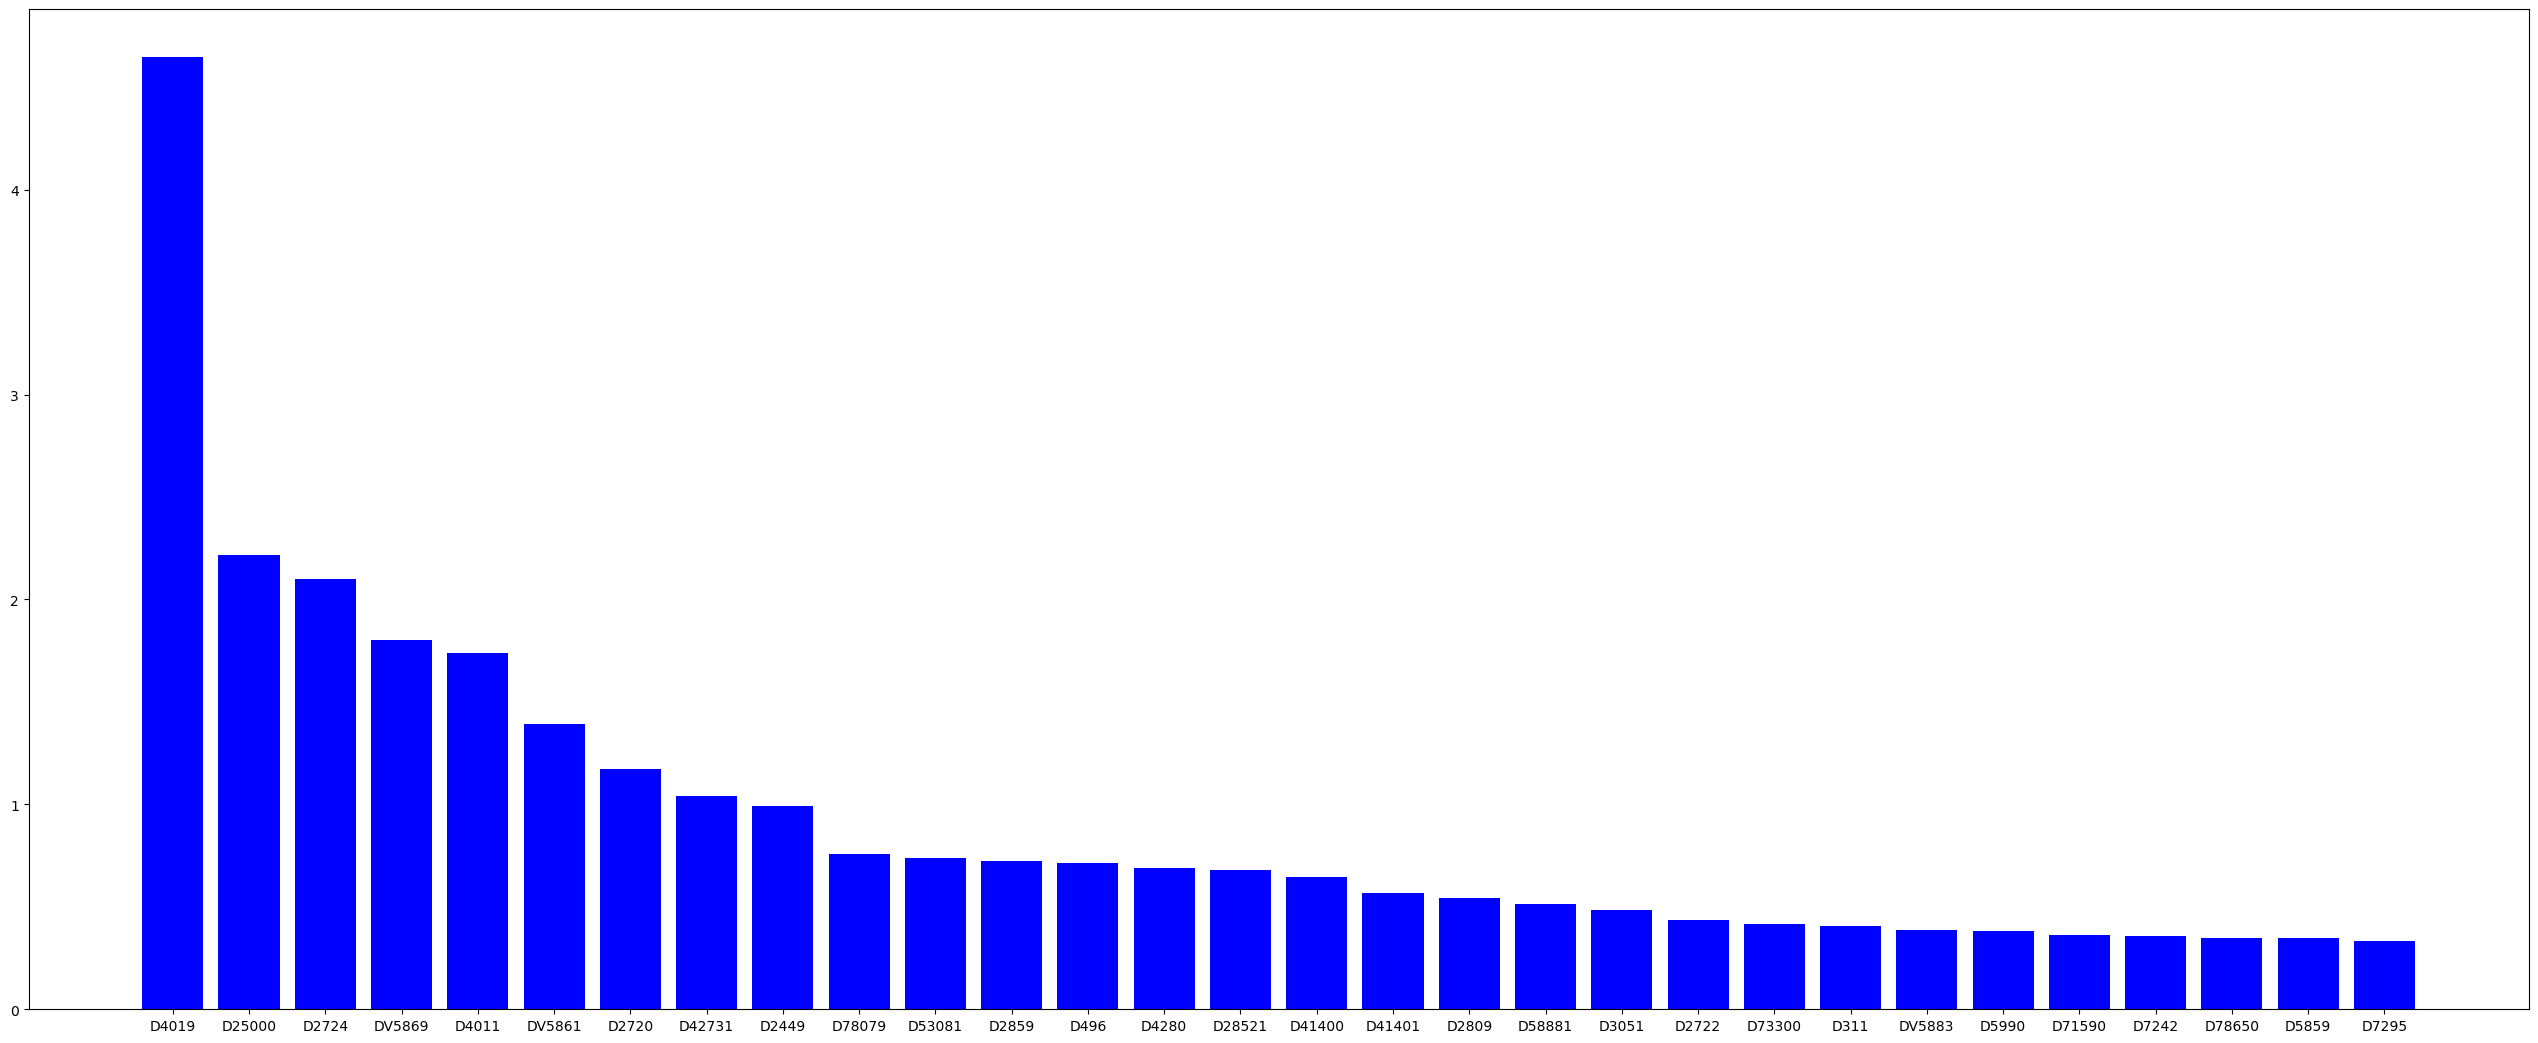

In [46]:
plot_diagnosis1 = diagnosis_g2.head(30)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_diagnosis1['diagnosis'] = 'D' + plot_diagnosis1['diagnosis'].astype(str)
plot_diagnosis1.sort_values(by=['Percentage'])
ax.bar(plot_diagnosis1['diagnosis'],plot_diagnosis1['Percentage'], color='blue')
plt.show()

In outpatient data diagnosis, the most common ones are 4019, 25000, 2724 among others.

The common procedures and diagnosis codes performed by the potential fradulent providers.

In [47]:
len(Train_Inpatientdata)

40474

In [48]:
Train_fraud =  pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
Train_fraud = Train.loc[(Train['PotentialFraud'] == 'Yes')]
fraud_provider_ip_df = pd.merge(Train_Inpatientdata, Train_fraud, how='inner', on='Provider')
len(fraud_provider_ip_df)

23402

In [49]:
print((len(fraud_provider_ip_df)/len(Train_Inpatientdata)) * 100, ' %')

57.81983495577408  %


Hence, out of 40474, there are 23402 inpatient cases with which the possible fraudulent providers interacted at some time during their hospital services. This represents around 58% of the instances in our inpatient data.

In [50]:
len(Train_Outpatientdata)
fraud_provider_op_df = pd.merge(Train_Outpatientdata, Train_fraud, how='inner', on='Provider')
len(fraud_provider_op_df)

189394

In [51]:
print((len(fraud_provider_op_df)/len(Train_Outpatientdata))*100, ' %')

36.58112130290089  %


Around 36% potential fradulent activities found for Outpatient.

INPATIENT
Common Procedures (Potential fradulent encounters)

In [52]:
procedures2 =  pd.DataFrame(columns = ['Procedures'])
procedures2['Procedures'] = pd.concat([
                                      fraud_provider_ip_df["ClmProcedureCode_1"], 
                                      fraud_provider_ip_df["ClmProcedureCode_2"], 
                                      fraud_provider_ip_df["ClmProcedureCode_3"], 
                                      fraud_provider_ip_df["ClmProcedureCode_4"], 
                                      fraud_provider_ip_df["ClmProcedureCode_5"], 
                                      fraud_provider_ip_df["ClmProcedureCode_6"]
                        ], axis=0, sort=True).dropna()

procedures2['Procedures'].head(10)
grouped_F_procedure = procedures2['Procedures'].value_counts()
     


In [53]:
grouped_F_procedure2 = grouped_F_procedure.to_frame()
grouped_F_procedure2.columns = ['count']
grouped_F_procedure2['Procedure'] = grouped_F_procedure2.index
grouped_F_procedure2['Percentage'] = (grouped_F_procedure2['count']/sum(grouped_F_procedure2['count']))*100

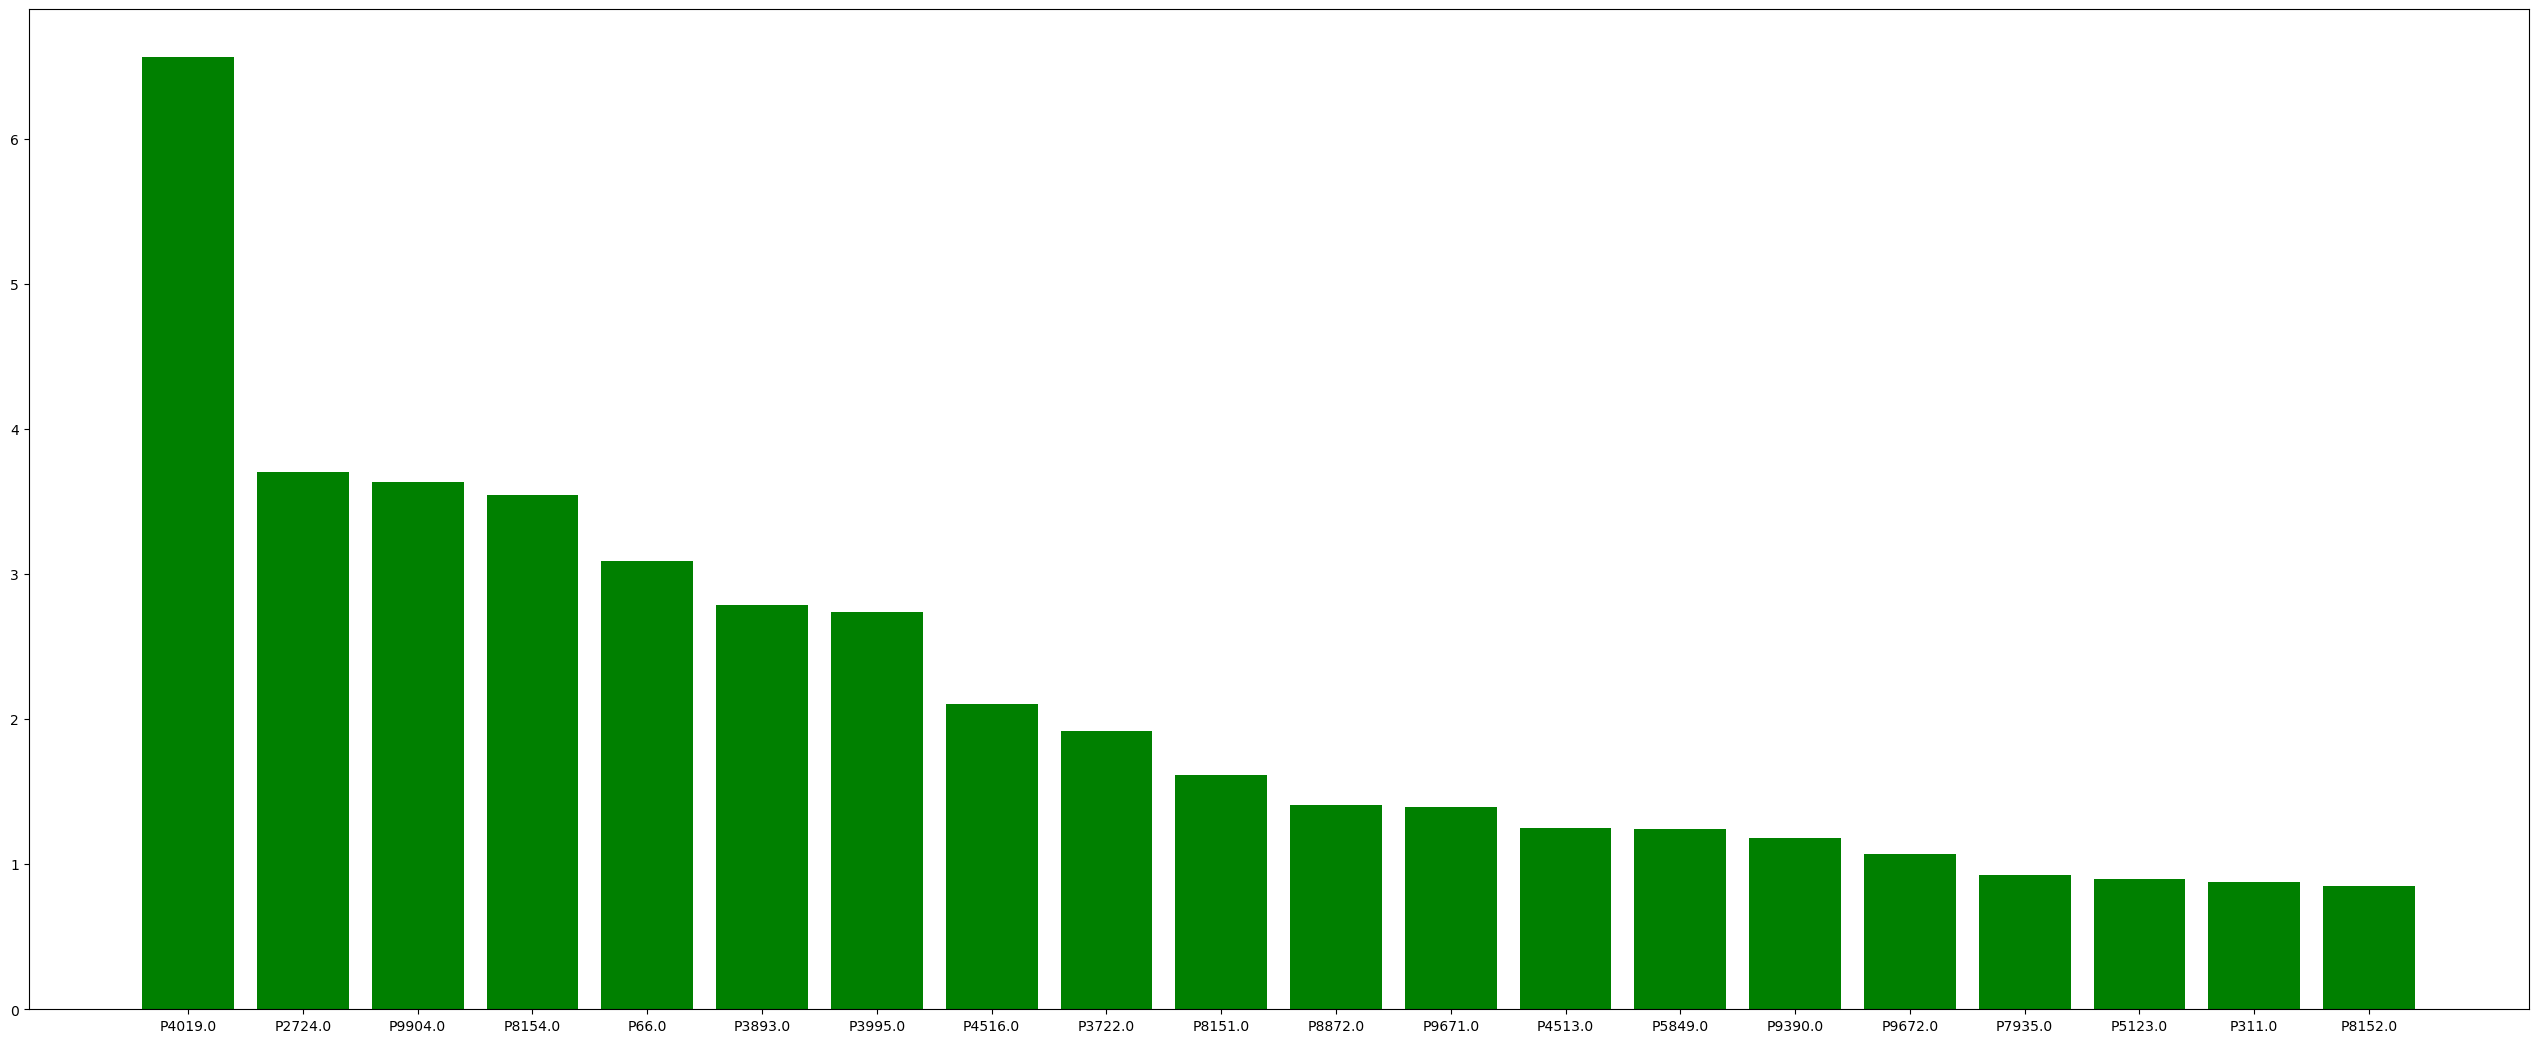

In [54]:


plot_F_procedure = grouped_F_procedure2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_procedure['Procedure'] = 'P' + plot_F_procedure['Procedure'].astype(str)
plot_F_procedure.sort_values(by=['Percentage'])
ax.bar(plot_F_procedure['Procedure'],plot_F_procedure['Percentage'], color='green')
plt.show()
     




The common procedures are 4019, 2734, 9904 among others.


Common Diagnosis (Potential fradulent encounters)

In [55]:
diagnosis2 = pd.DataFrame(columns = ['Diagnosis'])
diagnosis2['Diagnosis'] = pd.concat([
                                        fraud_provider_ip_df["ClmDiagnosisCode_1"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_2"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_3"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_4"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_5"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_6"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_7"],  
                                        fraud_provider_ip_df["ClmDiagnosisCode_8"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_9"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_10"]
                                        ], axis=0, sort=True).dropna()
diagnosis2['Diagnosis'].head(10)
grouped_F_diagnosis = diagnosis2['Diagnosis'].value_counts()
     

In [56]:
grouped_F_diagnosis2 = grouped_F_diagnosis.to_frame()
grouped_F_diagnosis2.columns = ['count']
grouped_F_diagnosis2['Diagnosis'] = grouped_F_diagnosis2.index
grouped_F_diagnosis2['Percentage'] = (grouped_F_diagnosis2['count']/sum(grouped_F_diagnosis2['count']))*100

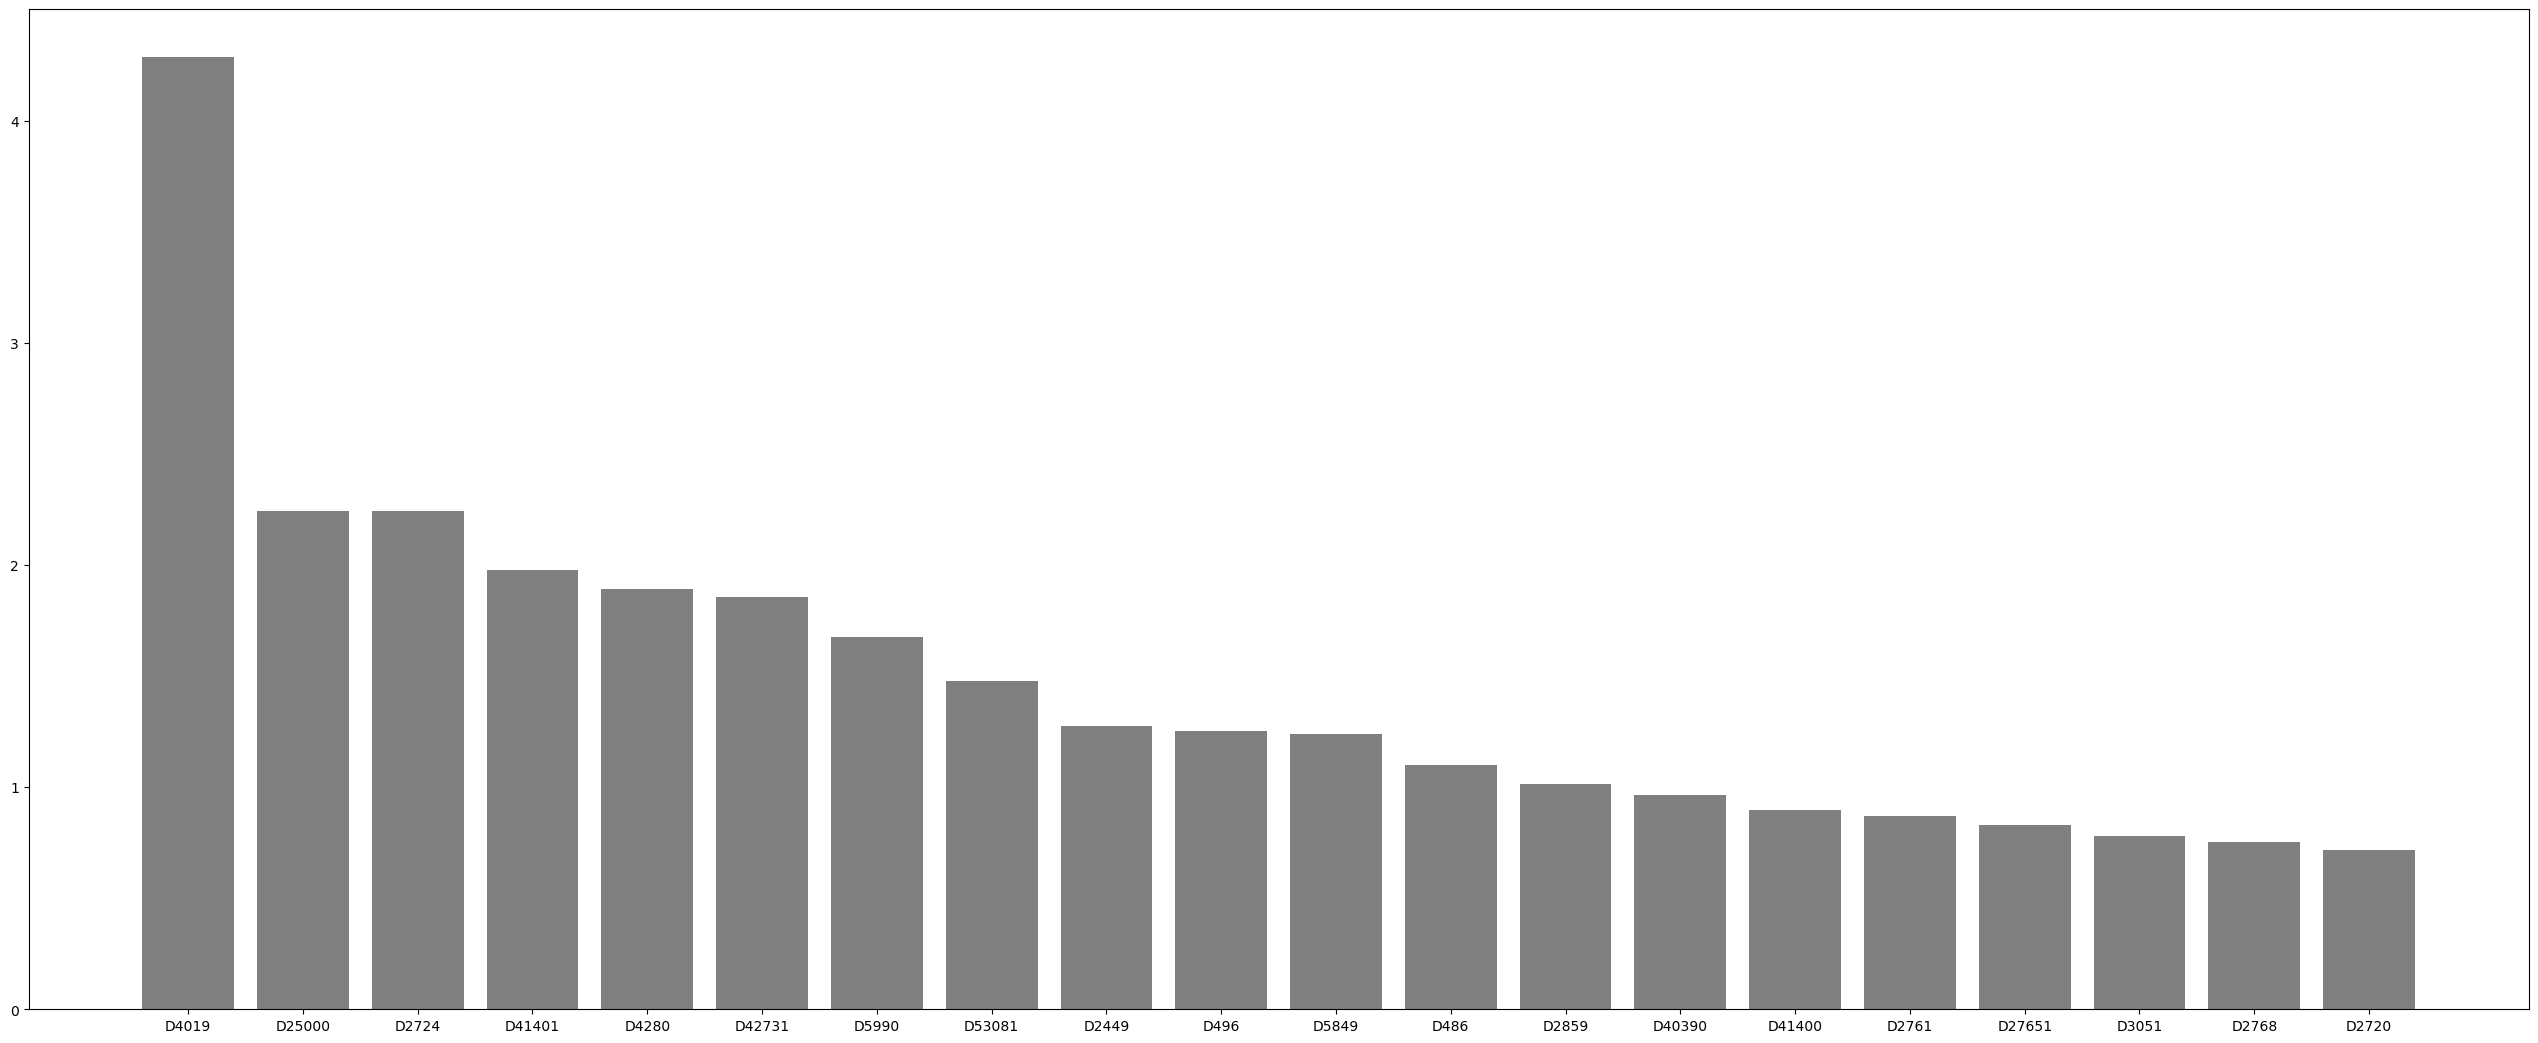

In [57]:
plot_F_diagnosis = grouped_F_diagnosis2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_diagnosis['Diagnosis'] = 'D' + plot_F_diagnosis['Diagnosis'].astype(str)
plot_F_diagnosis.sort_values(by=['Percentage'])
ax.bar(plot_F_diagnosis['Diagnosis'],plot_F_diagnosis['Percentage'], color='grey')
plt.show()



It is the same as the usual common diagnosis


OUTPATIENT
Common Procedure (Potential fradulent encounters)

In [58]:


procedures2 =  pd.DataFrame(columns = ['Procedures'])
procedures2['Procedures'] = pd.concat([
                                             fraud_provider_op_df["ClmProcedureCode_1"], 
                                             fraud_provider_op_df["ClmProcedureCode_2"], 
                                             fraud_provider_op_df["ClmProcedureCode_3"], 
                                             fraud_provider_op_df["ClmProcedureCode_4"], 
                                             fraud_provider_op_df["ClmProcedureCode_5"], 
                                             fraud_provider_op_df["ClmProcedureCode_6"]
                                             ], axis=0, sort=True).dropna()
procedures2['Procedures'].head(10)
grouped_F_procedure2 = procedures2['Procedures'].value_counts()
     

grouped_F_procedure_opdf2 = grouped_F_procedure2.to_frame()
grouped_F_procedure_opdf2.columns = ['count']
grouped_F_procedure_opdf2['Procedure'] = grouped_F_procedure_opdf2.index
grouped_F_procedure_opdf2['Percentage'] = (grouped_F_procedure_opdf2['count']/sum(grouped_F_procedure_opdf2['count']))*100
     


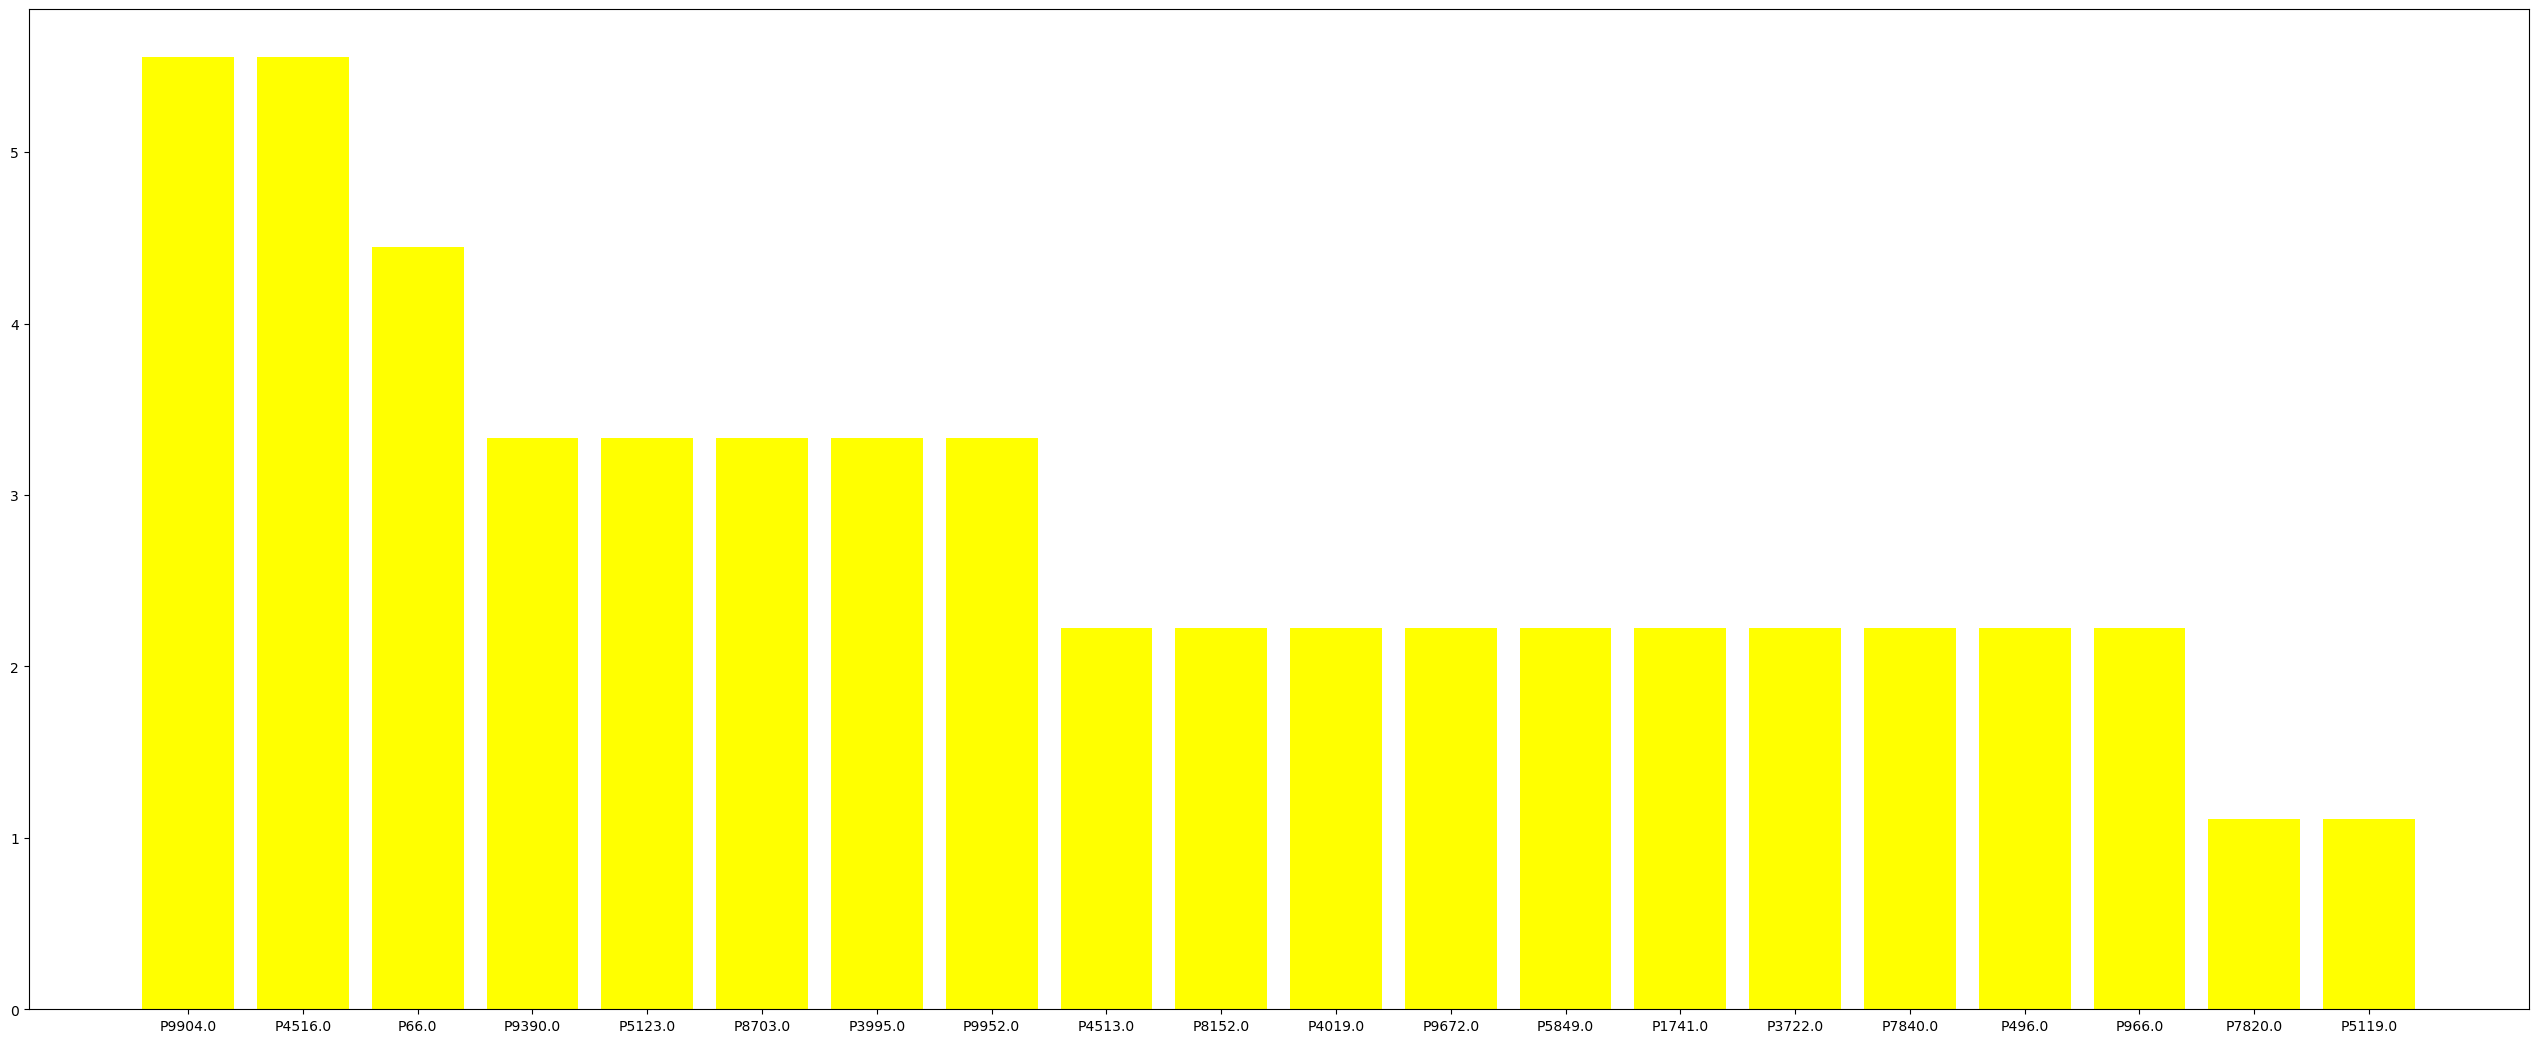

In [59]:
plot_F_procedure_opdf1 = grouped_F_procedure_opdf2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_procedure_opdf1['Procedure'] = 'P' + plot_F_procedure_opdf1['Procedure'].astype(str)
plot_F_procedure_opdf1.sort_values(by=['Percentage'])
ax.bar(plot_F_procedure_opdf1['Procedure'],plot_F_procedure_opdf1['Percentage'], color='yellow')
plt.show()
     

The most common procedure are 9904, 4516 & 66. These are little bit different than the inpatient data.

Diagnosis

In [60]:


diagnosis2 = pd.DataFrame(columns = ['Diagnosis'])
diagnosis2['Diagnosis'] = pd.concat([
                                           fraud_provider_op_df["ClmDiagnosisCode_1"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_2"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_3"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_4"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_5"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_6"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_7"],  
                                           fraud_provider_op_df["ClmDiagnosisCode_8"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_9"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_10"]
                                           ], axis=0, sort=True).dropna()
diagnosis2['Diagnosis'].head(10)
grouped_F_diagnosis2 = diagnosis2['Diagnosis'].value_counts()
     

grouped_F_diagnosis_opdf2 = grouped_F_diagnosis2.to_frame()
grouped_F_diagnosis_opdf2.columns = ['count']
grouped_F_diagnosis_opdf2['Diagnosis'] = grouped_F_diagnosis_opdf2.index
grouped_F_diagnosis_opdf2['Percentage'] = (grouped_F_diagnosis_opdf2['count']/sum(grouped_F_diagnosis_opdf2['count']))*100
     


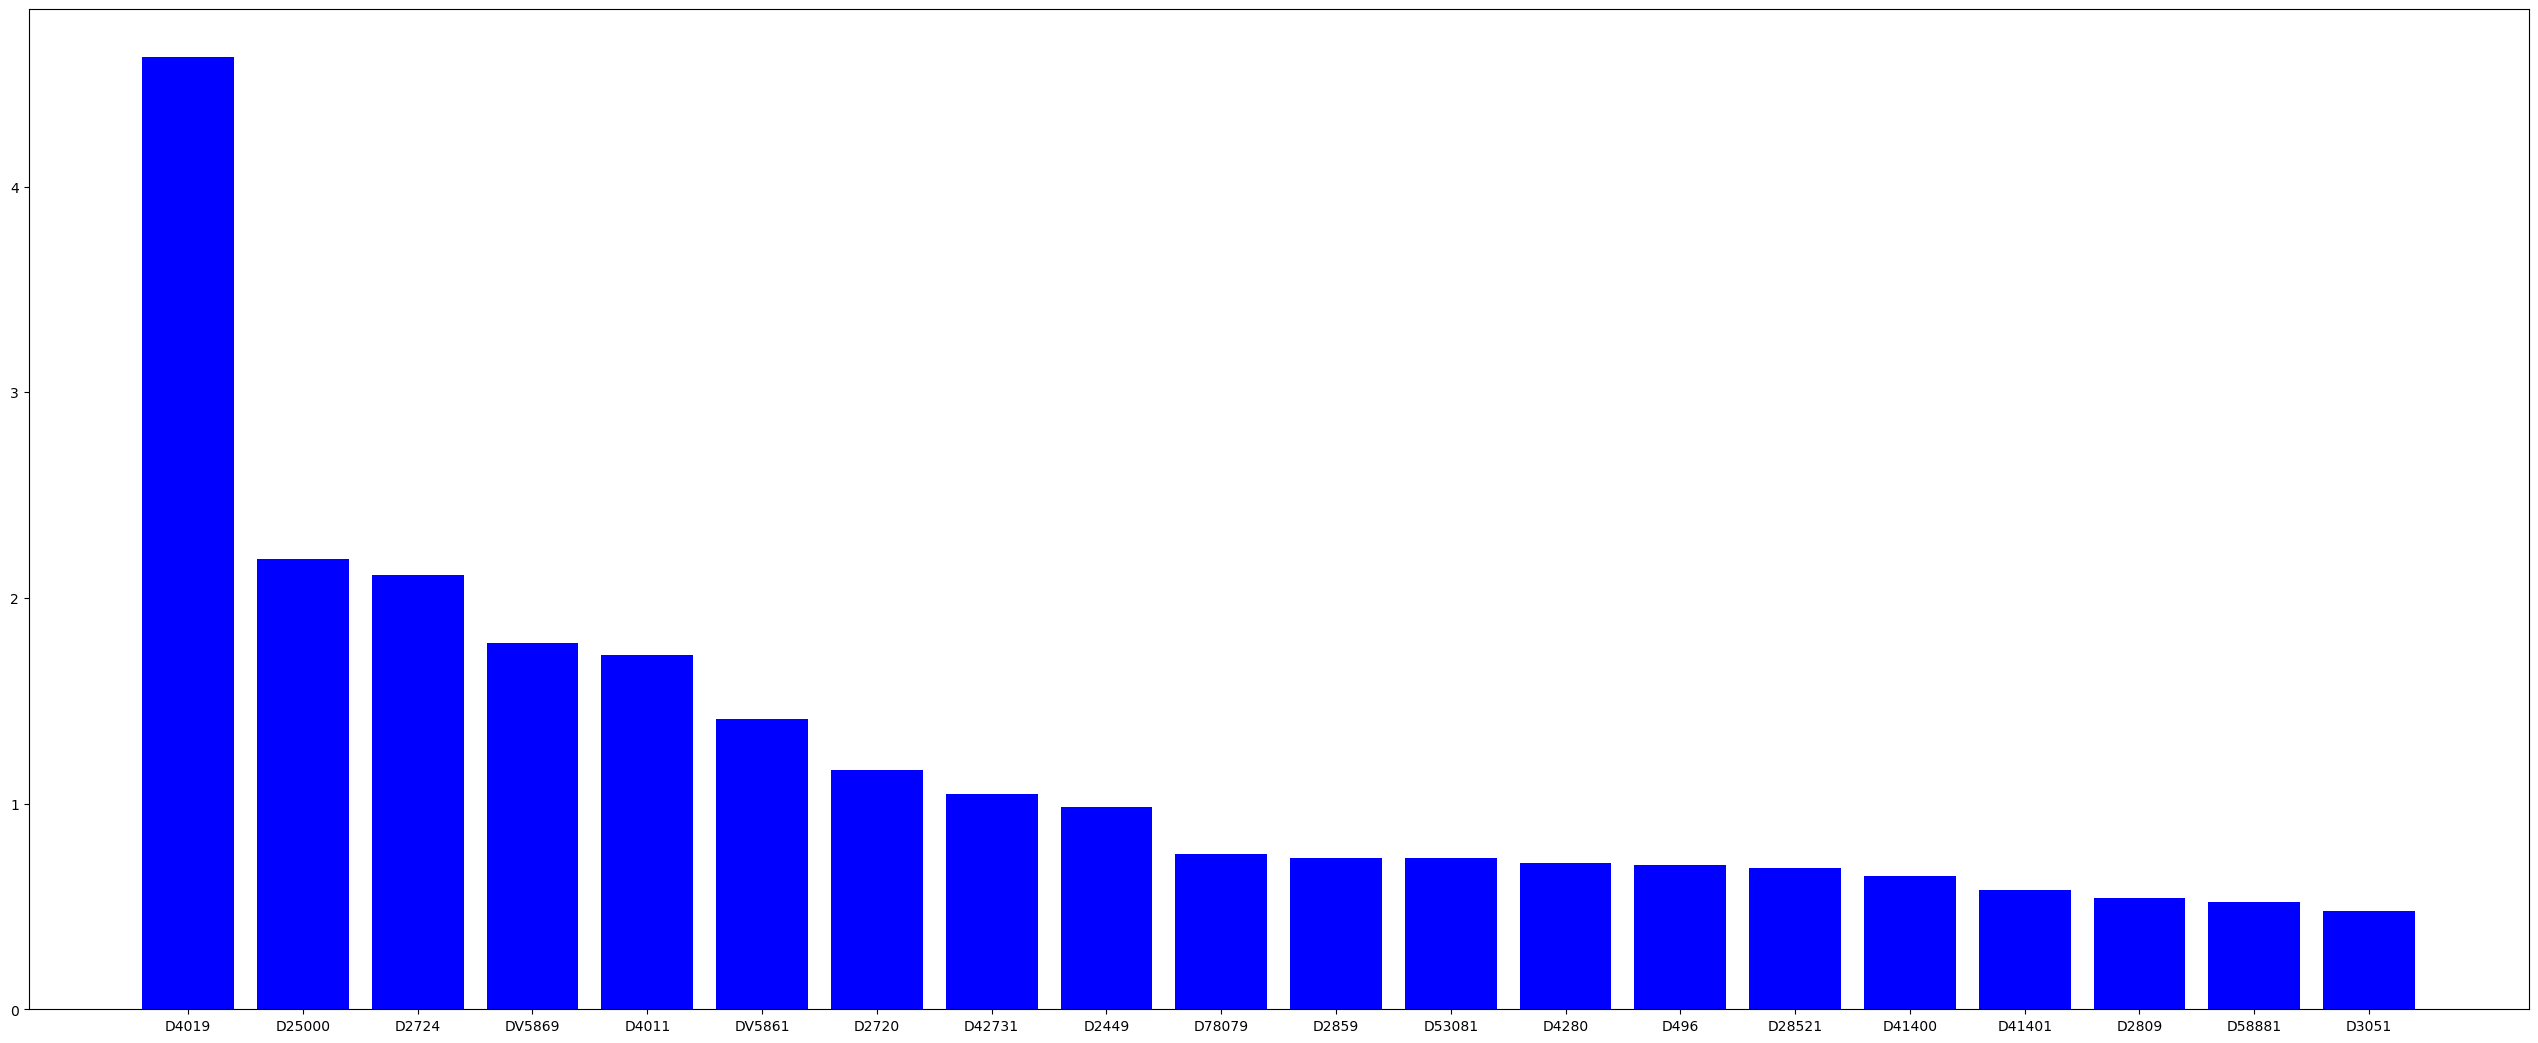

In [61]:
plot_F_diagnosis_opdf1 = grouped_F_diagnosis_opdf2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_diagnosis_opdf1['Diagnosis'] = 'D' + plot_F_diagnosis_opdf1['Diagnosis'].astype(str)
plot_F_diagnosis_opdf1.sort_values(by=['Percentage'])
ax.bar(plot_F_diagnosis_opdf1['Diagnosis'],plot_F_diagnosis_opdf1['Percentage'], color='blue')
plt.show()



For diagnosis the data is almost same.


The States having the highest number of potential frauds

In [62]:
fraud_beneficiary_ip_op_df = pd.merge(Train_Beneficiarydata, fraud_provider_ip_df, how='inner', on='BeneID')
fraud_beneficiary_ip_op_df = pd.merge(Train_Beneficiarydata, fraud_provider_op_df, how='inner', on='BeneID')
Train_F_Beneficiary_grouped = fraud_beneficiary_ip_op_df['State'].value_counts()
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped.to_frame()
Train_F_Beneficiary_grouped1['Count'] =  Train_F_Beneficiary_grouped1['State']
Train_F_Beneficiary_grouped1['STATE'] = Train_F_Beneficiary_grouped1.index
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped1.drop(['State'], axis = 1)

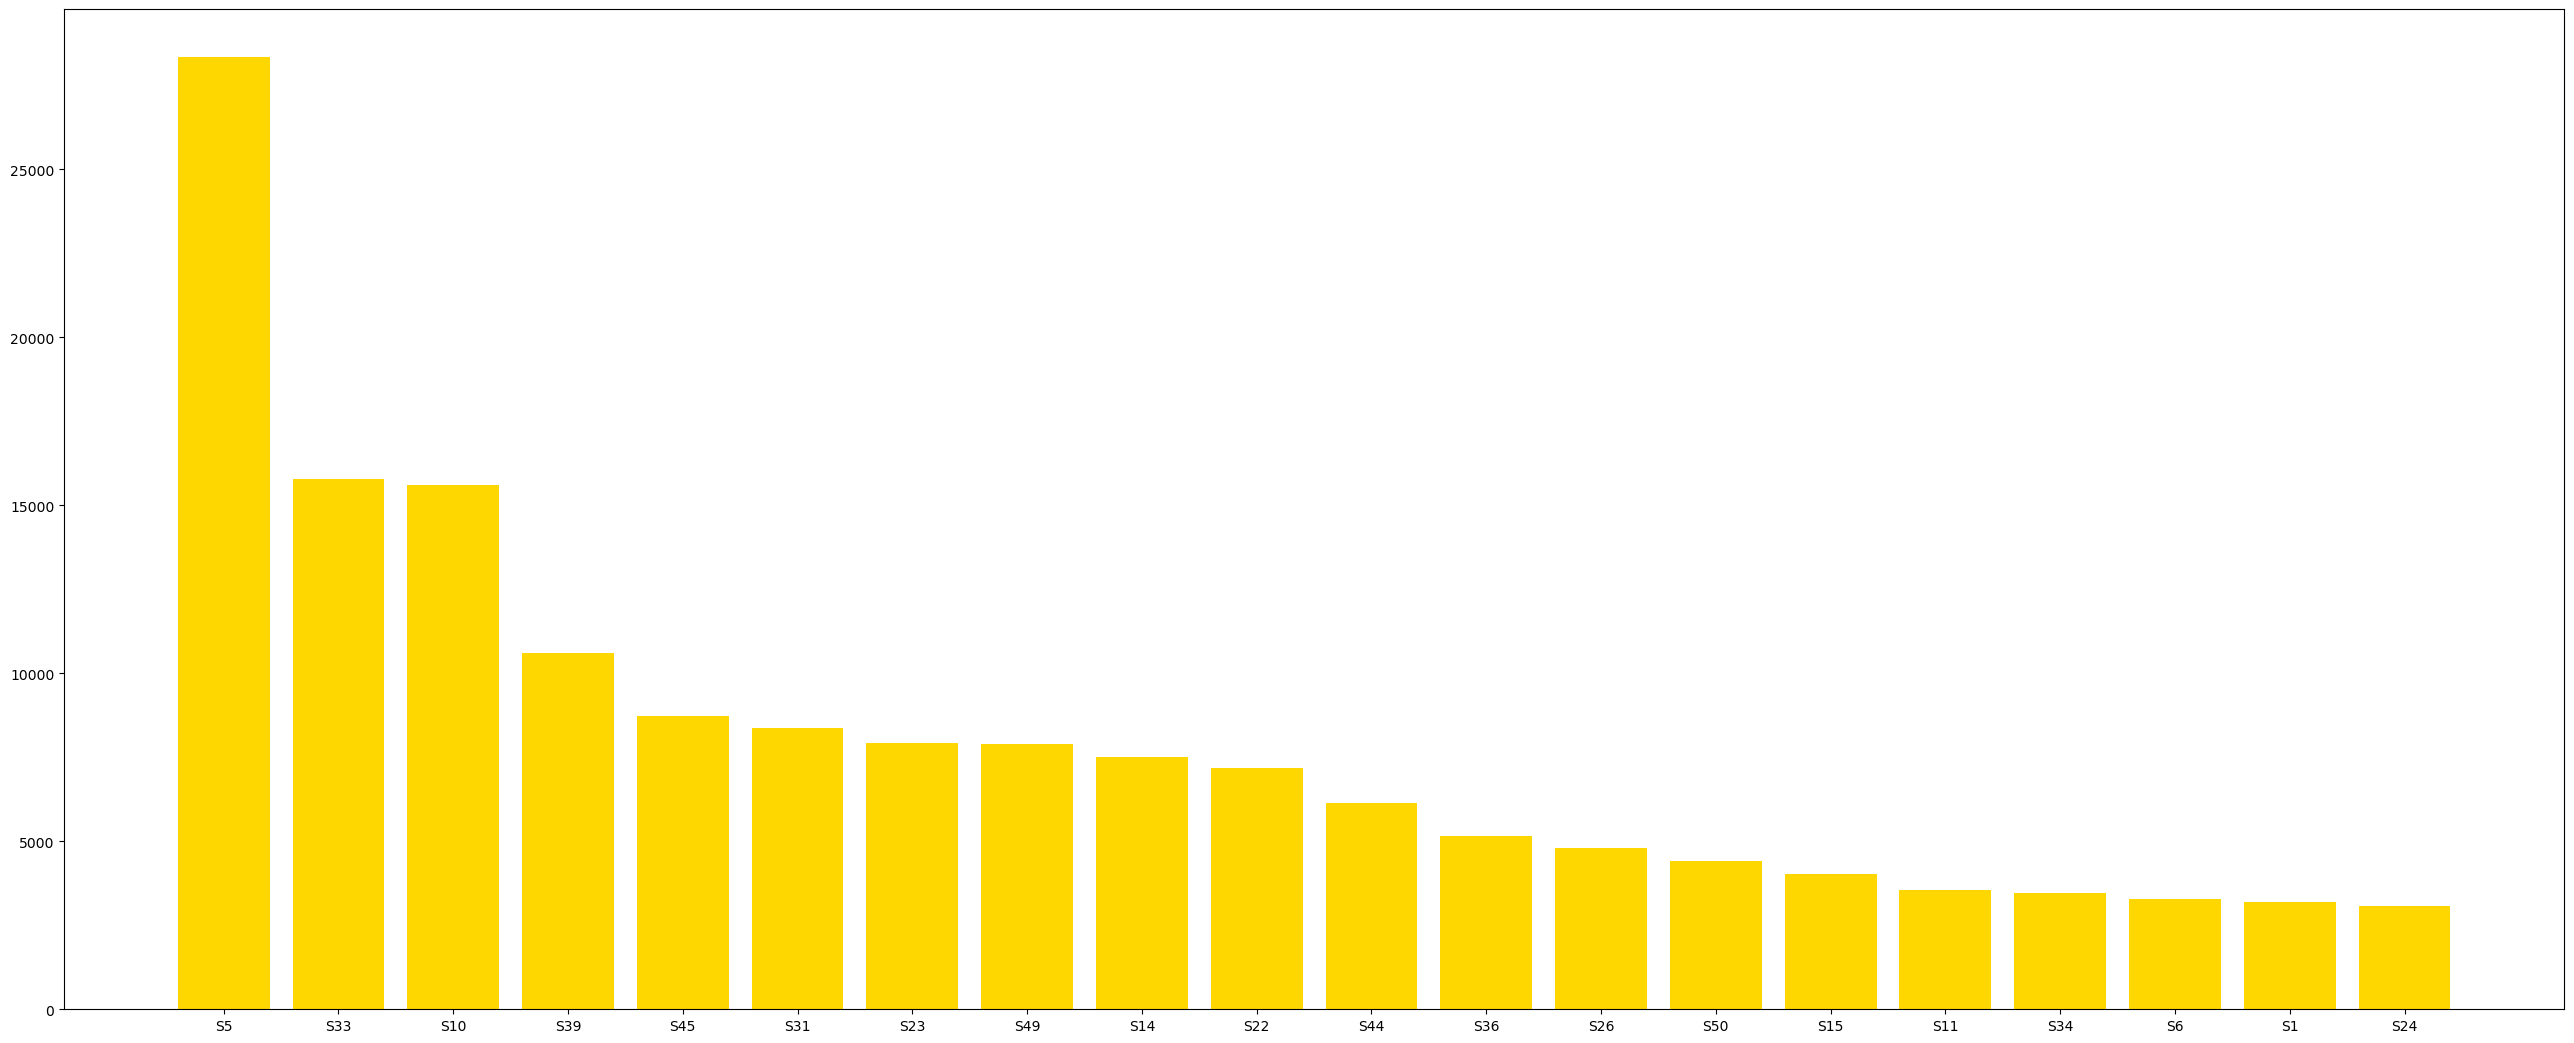

In [63]:
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped1.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

Train_F_Beneficiary_grouped1['STATE'] = 'S' + Train_F_Beneficiary_grouped1['STATE'].astype(str)
ax.bar(Train_F_Beneficiary_grouped1['STATE'],Train_F_Beneficiary_grouped1['Count'], color='gold')
plt.show()

We can see that the state code 5 has the highest number of Potential fradulent cases. The difference the highest and 2nd highest one is huge.

Inpatient - Attending Physician

<AxesSubplot:>

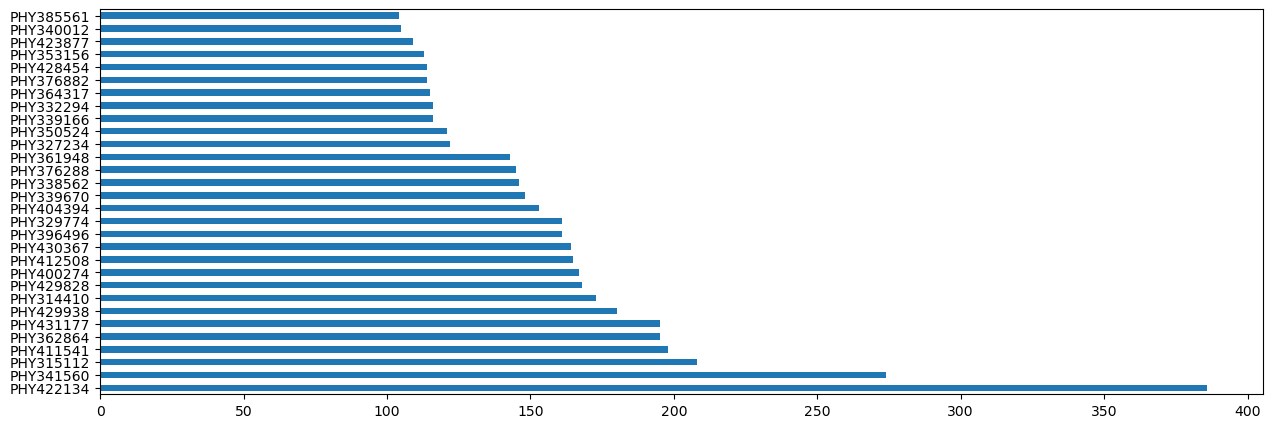

In [64]:
plt.figure(figsize=(15, 5))
Train_Inpatientdata.AttendingPhysician.value_counts().head(30).plot( x=Train_Inpatientdata.AttendingPhysician , kind = 'barh')



Most patinets are attended by pyhisican PHY422134.

Inpatient - Operating Physician

<AxesSubplot:>

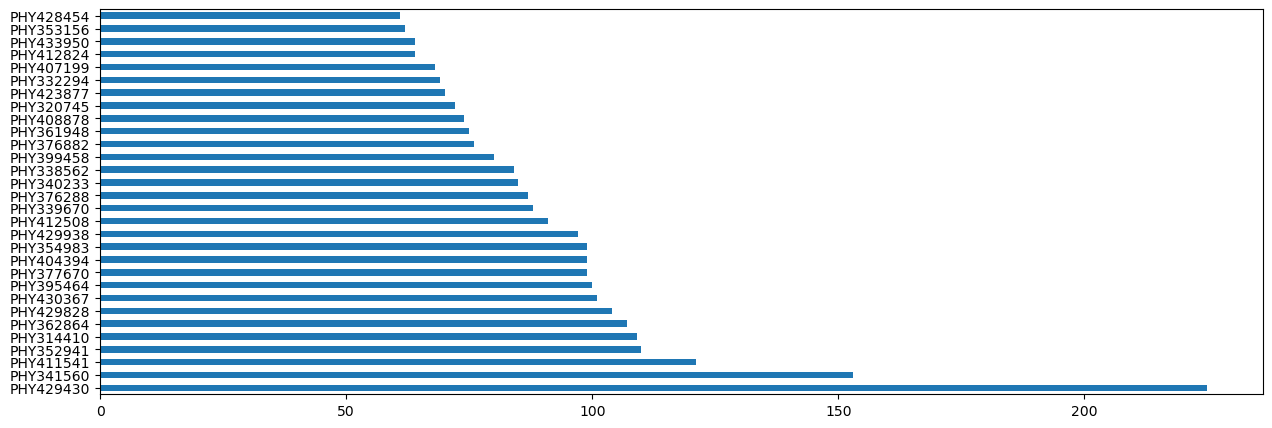

In [65]:
plt.figure(figsize=(15, 5))
Train_Inpatientdata.OperatingPhysician.value_counts().head(30).plot( x=Train_Inpatientdata.OperatingPhysician , kind = 'barh')

Pyhisican PHY429430 perfoms the most of the operations.

Outpatient - Attending Physician

<AxesSubplot:>

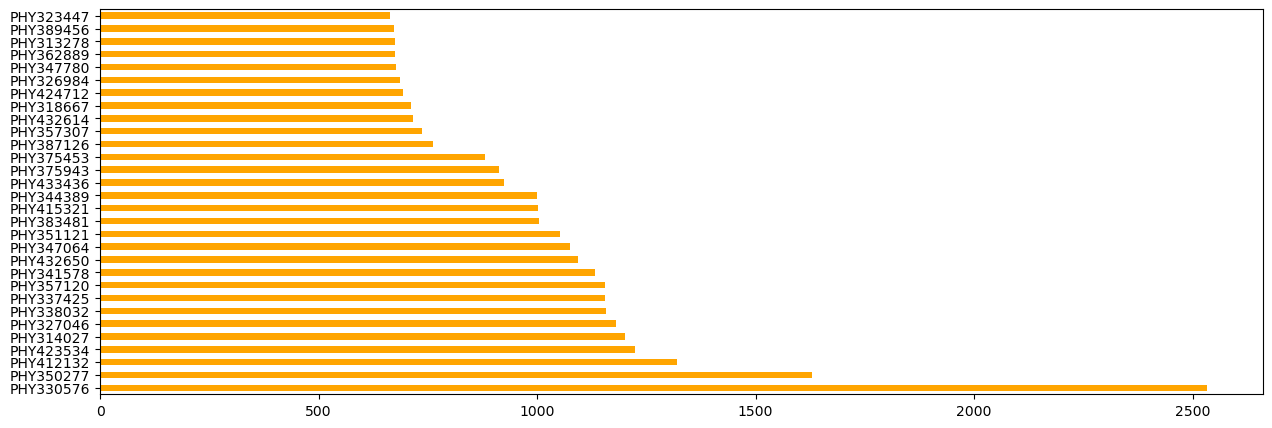

In [66]:
plt.figure(figsize=(15, 5))
Train_Outpatientdata.AttendingPhysician.value_counts().head(30).plot( x=Train_Outpatientdata.AttendingPhysician , kind = 'barh' , color = 'orange')



Most patinets are attended by pyhisican PHY330576.

Outpatient - Operating Physician

<AxesSubplot:>

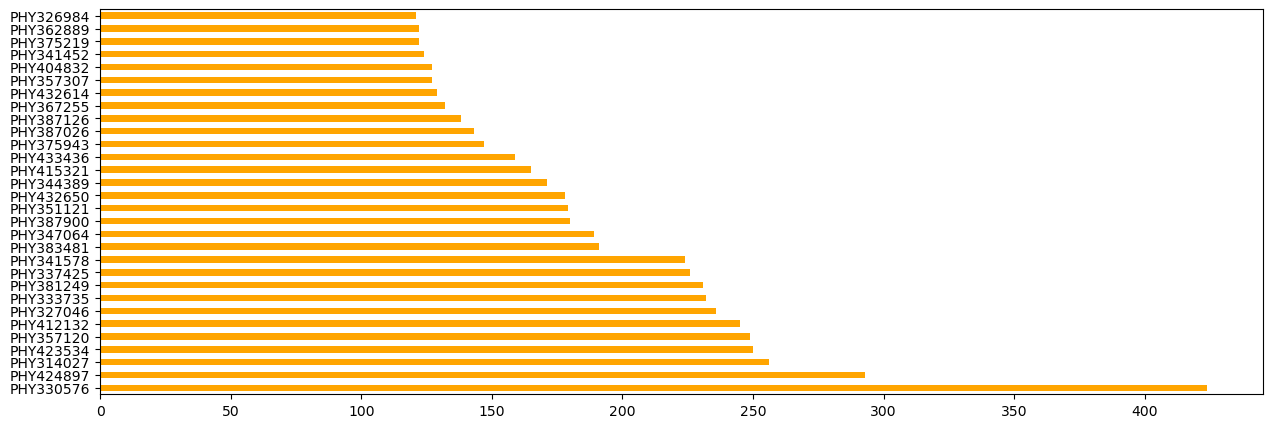

In [67]:
plt.figure(figsize=(15, 5))
Train_Outpatientdata.OperatingPhysician.value_counts().head(30).plot( x=Train_Outpatientdata.OperatingPhysician , kind = 'barh' , color = 'orange')


Pyhisican PHY330576 perfoms the most of the operations

Claim Amt Reimbursed: Inpatient

<AxesSubplot:xlabel='InscClaimAmtReimbursed', ylabel='Density'>

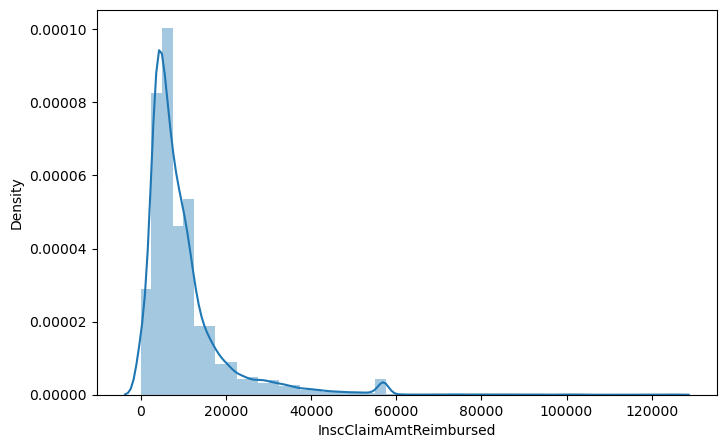

In [68]:
plt.figure(figsize=(8, 5))
sns.distplot(Train_Inpatientdata.InscClaimAmtReimbursed)

1. Distibution of ammount that is paid as claim reimbursement seems like log normal distribtion
2. All most all Reimbursed ammount is between 0 and 20000
3. In very few cases amount more than 20000 is paid for claim reimbursement


Claim Amt Reimbursed: Outpatient

<AxesSubplot:xlabel='InscClaimAmtReimbursed', ylabel='Density'>

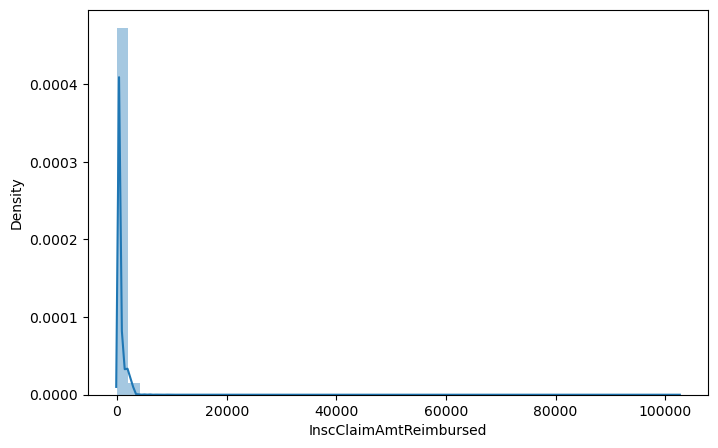

In [69]:
plt.figure(figsize=(8, 5))
sns.distplot(Train_Outpatientdata.InscClaimAmtReimbursed)

99.9 percentile value is 3500 

The age distribution for the probable fradulent activites.

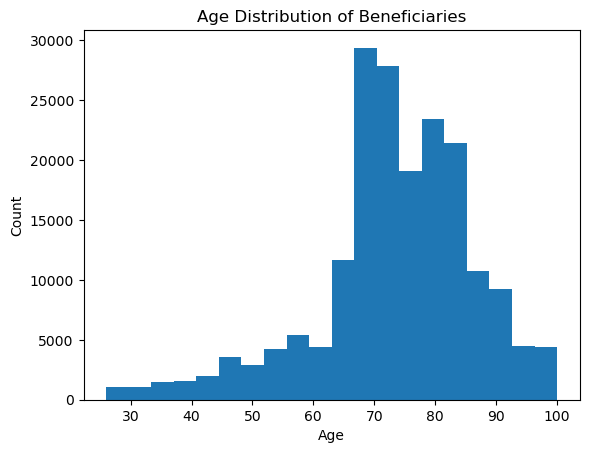

In [70]:
# Convert 'DOB' column to datetime format
fraud_beneficiary_ip_op_df['DOB'] = pd.to_datetime(fraud_beneficiary_ip_op_df['DOB'], format='%Y-%m-%d')

# Set current date to 2009-12-01
now = pd.to_datetime('2009-12-01', format='%Y-%m-%d')

# Adjust the birth date for beneficiaries born after the current date 
# by subtracting 100 years
fraud_beneficiary_ip_op_df['DOB'] = fraud_beneficiary_ip_op_df['DOB'].where(fraud_beneficiary_ip_op_df['DOB'] < now,
                                                                             fraud_beneficiary_ip_op_df['DOB'] - np.timedelta64(100, 'Y'))

# Calculate the age of each beneficiary based on their adjusted birth date
fraud_beneficiary_ip_op_df['age'] = (now - fraud_beneficiary_ip_op_df['DOB']).astype('timedelta64[Y]')

# Create a histogram of the age distribution for the beneficiaries
plt.hist(fraud_beneficiary_ip_op_df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Beneficiaries')
plt.show()


Most of the patients are of an age above 65 years.


Cost Distribution for INPATIENT data
The average cost of potential fraud claims.

In [71]:
reimb_inpatient = pd.merge(Train_Inpatientdata , Train , how='inner', on='Provider')
print(reimb_inpatient.shape)

(40474, 32)


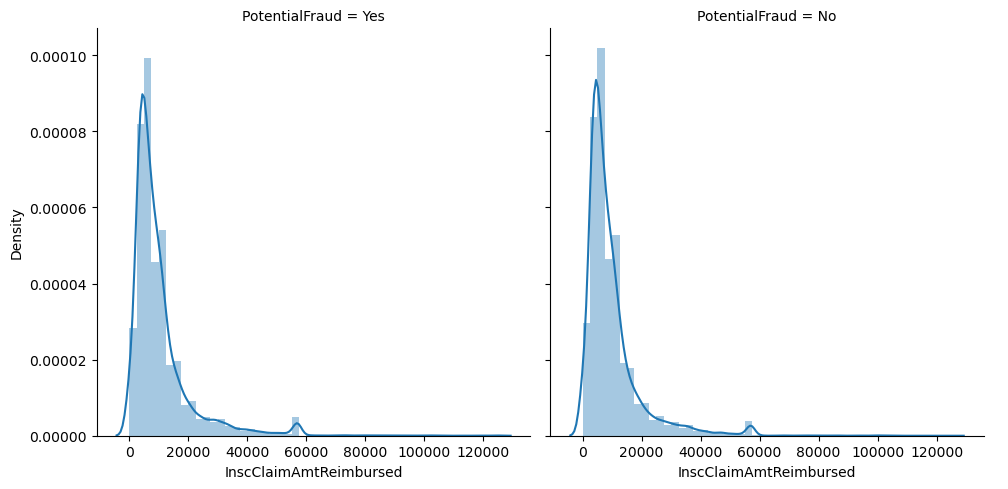

<Figure size 640x480 with 0 Axes>

In [72]:
sns.FacetGrid(reimb_inpatient, col='PotentialFraud',height=5).map(sns.distplot, "InscClaimAmtReimbursed",).add_legend()
plt.show()
plt.tight_layout()

In [73]:
Total_money_lost = reimb_inpatient.loc[reimb_inpatient['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost)

Total money lost :  241288510


In [74]:
reimb_outpatient = pd.merge(Train_Outpatientdata , Train , how='inner', on='Provider')
print(reimb_outpatient.shape)

(517737, 28)


In [75]:
#calculatinng total money lost ib fradulent encounters
Total_money_lost = reimb_outpatient.loc[reimb_outpatient['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

print("Total money lost : ",Total_money_lost)

Total money lost :  54392610


In [76]:
 print('Total monney lost as per the data for 2019 = ','241288510+54392610, That is around 290 Million' )

Total monney lost as per the data for 2019 =  241288510+54392610, That is around 290 Million


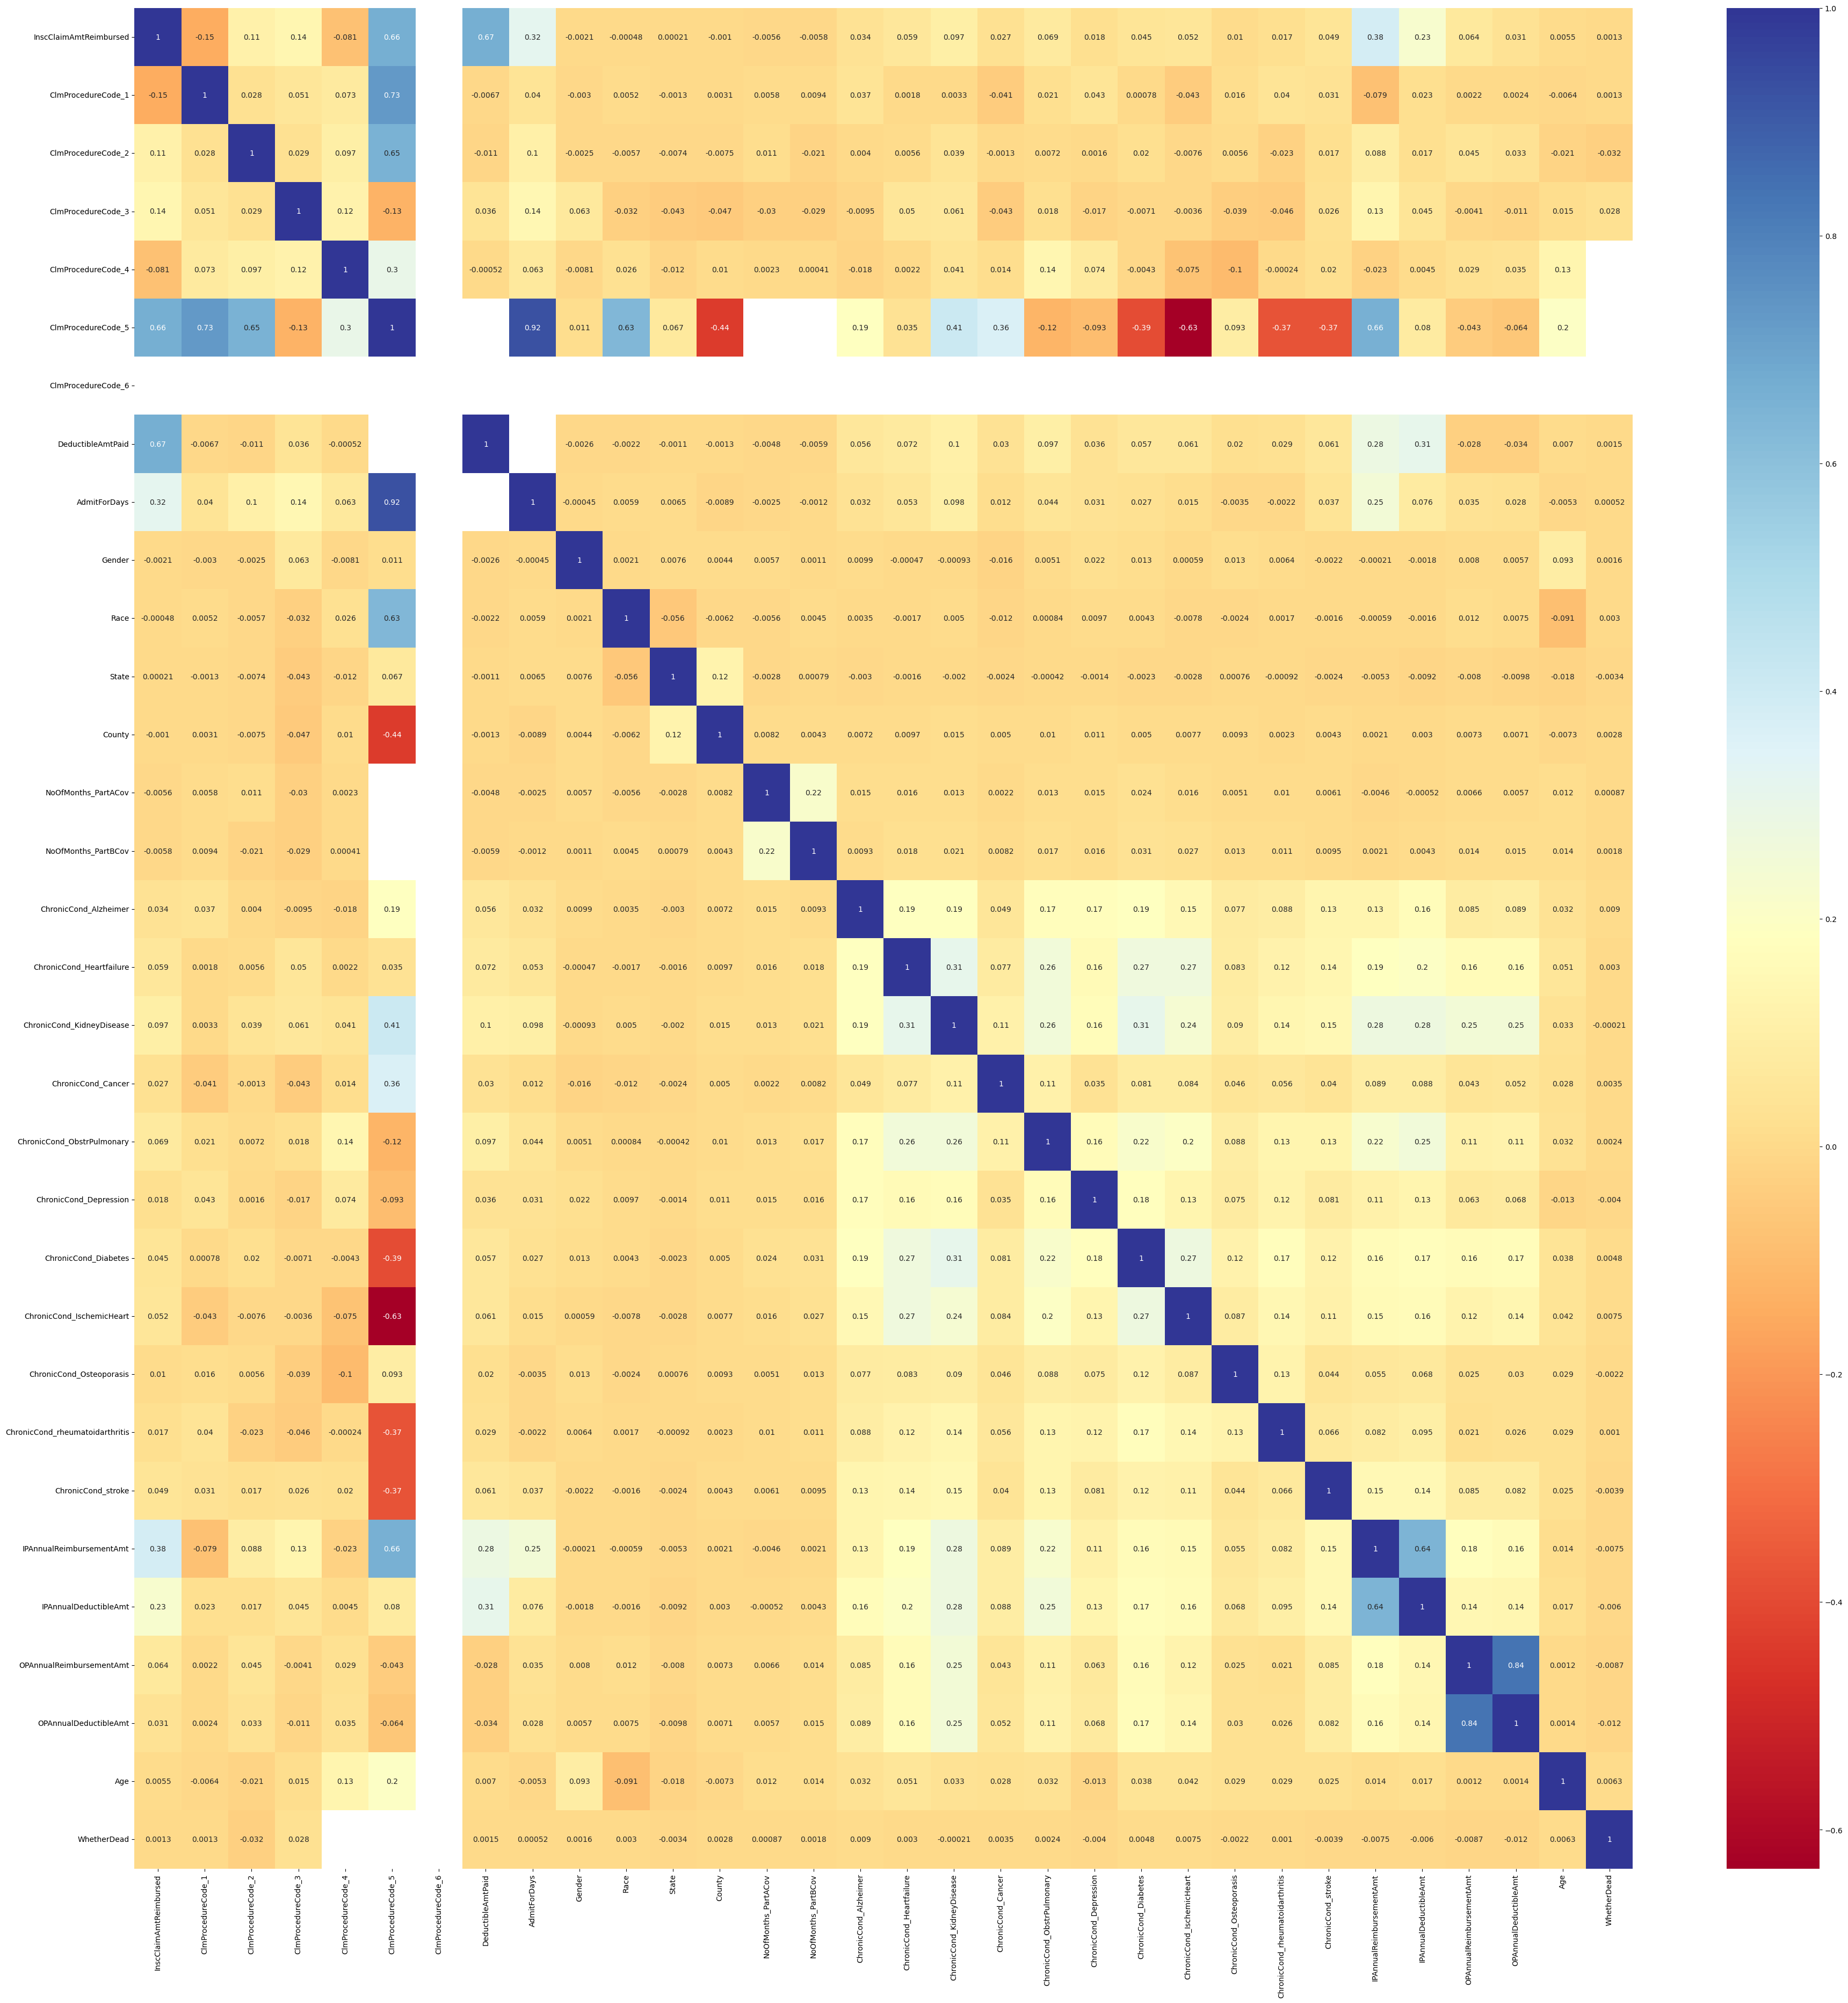

In [77]:
#Heatmap
plt.figure(figsize=(45,45))
sns.heatmap(Train_Provider.corr(), annot=True, cmap='RdYlBu');

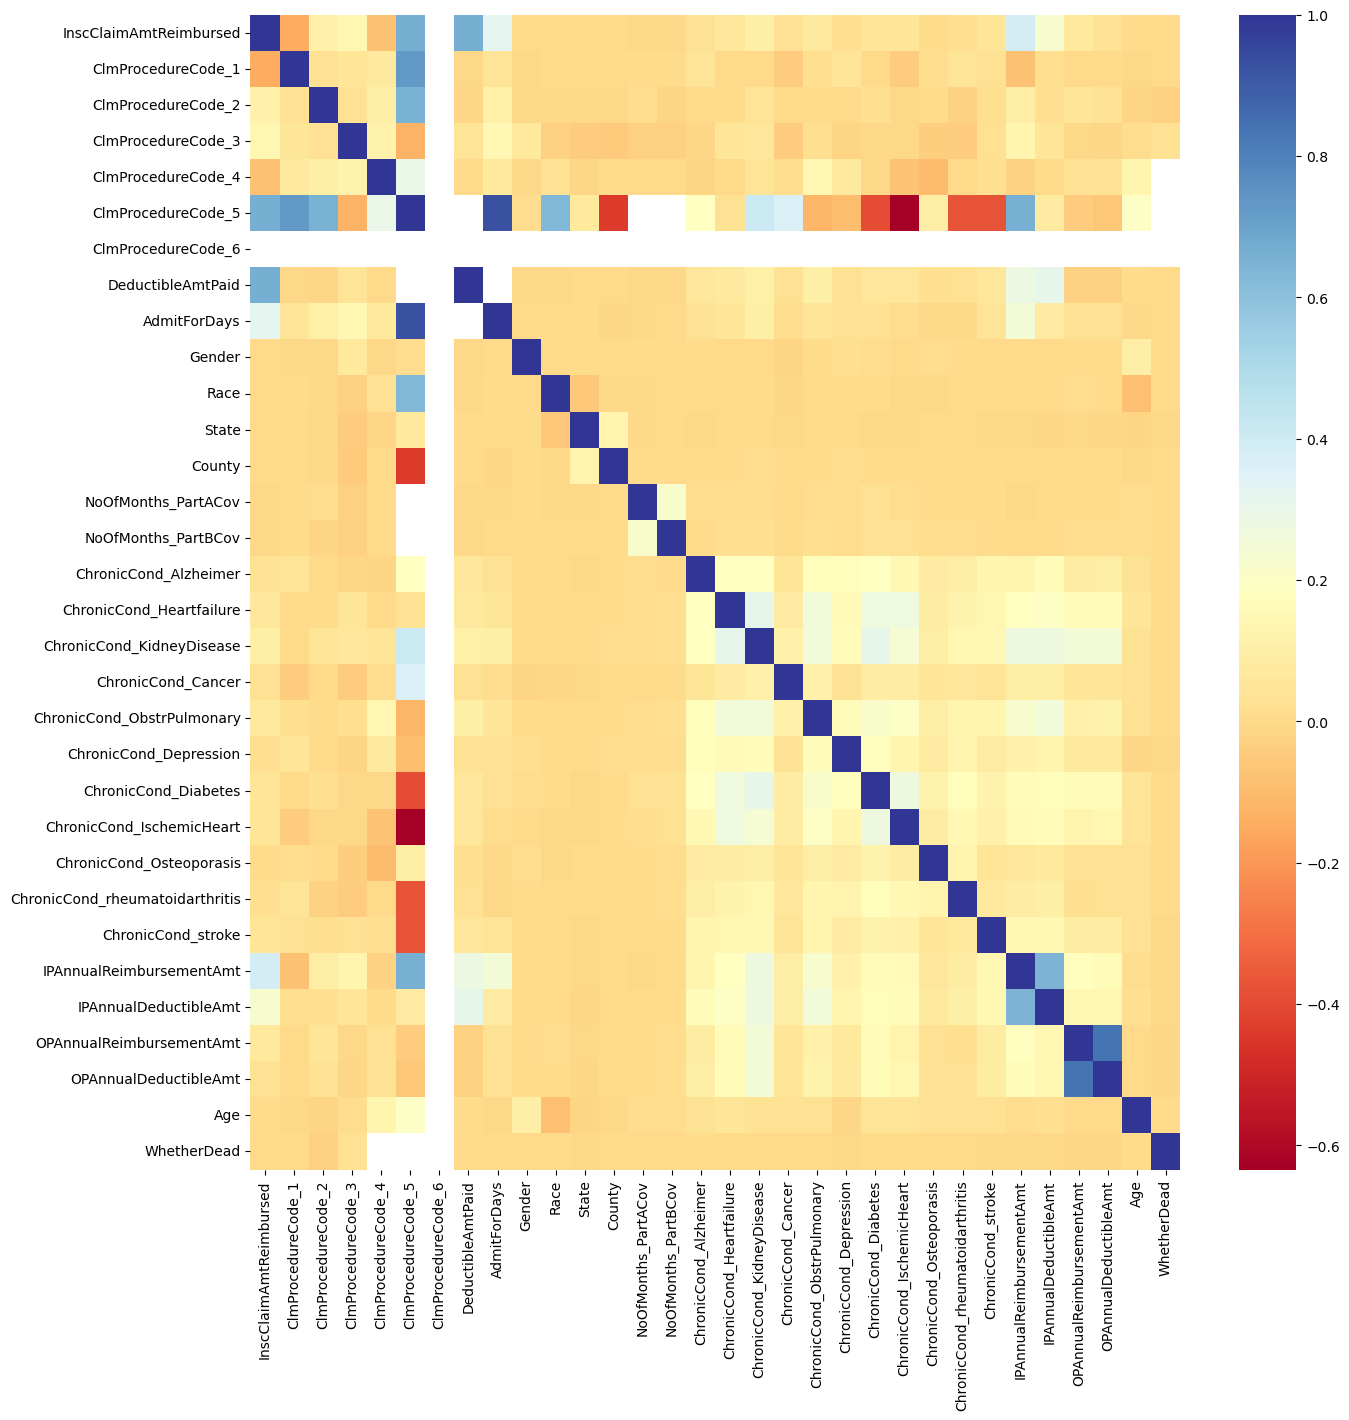

In [84]:
#Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(Train_Provider.corr(), cmap='RdYlBu');

In [85]:
matrix = Train_Provider.corr()
 
# print correlation matrix
print("Correlation Matrix is : ")
print(matrix)

Correlation Matrix is : 
                                 InscClaimAmtReimbursed  ClmProcedureCode_1  \
InscClaimAmtReimbursed                         1.000000           -0.145059   
ClmProcedureCode_1                            -0.145059            1.000000   
ClmProcedureCode_2                             0.108619            0.028000   
ClmProcedureCode_3                             0.136799            0.051397   
ClmProcedureCode_4                            -0.080588            0.072560   
ClmProcedureCode_5                             0.662121            0.727110   
ClmProcedureCode_6                                  NaN                 NaN   
DeductibleAmtPaid                              0.665488           -0.006736   
AdmitForDays                                   0.321795            0.039589   
Gender                                        -0.002094           -0.003014   
Race                                          -0.000477            0.005233   
State                      

### Data Preprocessing

In [86]:
#Imputing numeric columns with 0

cols1 = Train_Provider.select_dtypes([np.number]).columns
cols2 = Train_Provider.select_dtypes(exclude = [np.number]).columns

Train_Provider[cols1] = Train_Provider[cols1].fillna(value=0)
Test_Provider[cols1]=Test_Provider[cols1].fillna(value=0)
print('Test_Provider shape:',Test_Provider.shape)

Test_Provider shape: (693603, 57)


In [87]:
#Checking record number 135392 as this will be record from train datasets.
Test_Provider.iloc[[135392]]

,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51001,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,...,1,0,0,0,0,0,300,110,80.0,0.0


**Feature Selection**

In [88]:
#Removing unnecessary columns

cols=Train_Provider.columns
cols[:58]

remove_these_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'ClmAdmitDiagnosisCode', 'AdmissionDt',
       'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD',
        'State', 'County']

Train_fs=Train_Provider.drop(axis=1,columns=remove_these_columns)
Test_fs=Test_Provider.drop(axis=1,columns=remove_these_columns)


In [89]:
#Checking shape and missing values

print('Train Shape :',Train_fs.shape)
print('Test Shape : ',Test_fs.shape)
print("Train Missing Values",Train_fs.isnull().sum().sum())
print("Test Missing Values",Test_fs.isnull().sum().sum())

Train Shape : (558211, 27)
Test Shape :  (693603, 26)
Train Missing Values 0
Test Missing Values 0


**Type Conversion**

In [90]:
#Converting types of gender and race to categorical.-->reduces time & allows for easy manipulation 

Train_fs.Gender=Train_fs.Gender.astype('category')
Test_fs.Gender=Test_fs.Gender.astype('category')

Train_fs.Race=Train_fs.Race.astype('category')
Test_fs.Race=Test_fs.Race.astype('category')

In [91]:
#Creating dummies for categorrical columns.

Train_fs=pd.get_dummies(Train_fs,columns=['Gender','Race'],drop_first=True)
Test_fs=pd.get_dummies(Test_fs,columns=['Gender','Race'],drop_first=True)

In [92]:
Train_fs.head()


,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,No,20,0.0,0.0,1,12,12,1,1,...,0,0,300,110,80.0,0.0,0,0,0,0
1,PRV51001,No,700,0.0,0.0,0,12,12,1,0,...,0,0,720,10,67.0,0.0,0,0,0,0
2,PRV51001,No,900,0.0,0.0,0,12,12,0,0,...,0,0,1380,370,76.0,0.0,1,0,0,0
3,PRV51001,No,500,0.0,0.0,0,12,12,1,1,...,2020,1068,6700,2700,74.0,0.0,0,0,0,0
4,PRV51001,No,36000,1068.0,5.0,0,12,12,0,1,...,36000,1068,3520,140,69.0,0.0,0,0,0,0


In [93]:
#Converting Target values to 1 and 0,where '1' means Yes and '0' means No

Train_fs.PotentialFraud.replace(['Yes','No'],['1','0'],inplace=True)
Train_fs.head()
Train_fs.PotentialFraud=Train_fs.PotentialFraud.astype('int64')
Train_fs.PotentialFraud.dtypes

dtype('int64')

In [94]:
print('Test Shape before removing',Test_fs.shape)

Test Shape before removing (693603, 28)


In [95]:
Test_fs=Test_fs.iloc[:135392]   #Remove train data from appended test data (as 135392 is the last record of train data)

In [96]:
#Aggregating claims data to unique providers.

Train=Train_fs.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')
Test=Test_fs.groupby(['Provider'],as_index=False).agg('sum')

In [97]:
Train.head(2)

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmitForDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,Gender_2,Race_2,Race_3,Race_5
0,PRV51001,0,104640,5340.0,30.0,300,300,15,19,17,...,440150,22428,65380,11598,1971.0,0.0,16.0,4.0,0.0,0.0
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,...,999000,122948,353520,97300,9243.0,1.0,78.0,24.0,0.0,1.0


In [98]:
print('Providers in Train:' ,Train.shape)
print('Providers in Test :',Test.shape)

Providers in Train: (5410, 28)
Providers in Test : (1353, 27)


**Train Validation split**

In [99]:
#Seperate out Target and providers from independent variables.Create Target column y.

X=Train.drop(axis=1,columns=['Provider','PotentialFraud'])
y=Train['PotentialFraud']

In [100]:
#Feature Scaling: standerdization

#Apply StandardScaler and transform values to its z form,where 99.7% values range between -3 to 3.
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std=sc.transform(X)

X_teststd=sc.transform(Test.iloc[:,1:])   #Apply Standard Scaler to unseen data as well.

In [101]:
print('X Shape:',X_std.shape)

X Shape: (5410, 26)
